In [1]:
from uuid import uuid4

UUID = str(uuid4())
# UUID = '5d6aa3f7-5675-45ab-a056-f43a14b637dc'
# UUID = 'empirical_params_5d6aa3f7-5675-45ab-a056-f43a14b637dc'
UUID = 'num_of_p=25,num_of_i=50,eps=0.1_1b09e353-7fe1-449c-9baf-d20a8e960f14'
# UUID = 'num_of_p=25,num_of_i=100,eps=0.1_20f2d302-7e51-42a8-90b2-acb5343b51ec'
# print(UUID)
# UUID = 'empirical_params_afbe77cb-eeff-4e5e-9aa8-db2fbc61a0d8'


In [2]:
from config import paths

DATASET_NAME = "1138_bus"
EDGE_WEIGHT = 30
EXPORT_DIR = (
    paths.get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("initial_placement")
    .joinpath("random_vs_mds")
    .joinpath(UUID)
)
N_INIT_POS = 100
FIXED_SEED = 0
NAME_ABBREVIATIONS = {
    "angular_resolution": "ANR",
    "aspect_ratio": "AR",
    "crossing_angle": "CA",
    "crossing_number": "CN",
    "gabriel_graph_property": "GB",
    "ideal_edge_lengths": "IE",
    "node_resolution": "NR",
    "run_time": "RT",
    "neighborhood_preservation": "NP",
    "stress": "ST",
}

N_ITER = 50
N_PIVOTS = 25
EPS = 0.1


In [3]:
from config import paths
from utils import graph
from tqdm import tqdm
import pandas as pd
import networkx as nx

EXPORT_DIR.mkdir(parents=True, exist_ok=True)
dataset_path = paths.get_dataset_path(dataset_name=DATASET_NAME)
nx_graph = graph.load_nx_graph(
    dataset_name=DATASET_NAME, edge_weight=EDGE_WEIGHT
)


In [4]:
# initial placement with mds
from generators import graph
from egraph import Graph, warshall_floyd, ClassicalMds
from uuid import uuid4
import random

method_name = "mds"
export_dir = EXPORT_DIR.joinpath(method_name)
export_dir.mkdir(parents=True, exist_ok=True)

eg_graph, eg_indices = graph.egraph_graph(nx_graph=nx_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)

mds = ClassicalMds()

df = pd.DataFrame()
for _ in tqdm(range(N_INIT_POS)):
    pos_id = str(uuid4())

    shuffled_nodes = random.sample(list(nx_graph.nodes), len(nx_graph.nodes))
    eg_graph = Graph()
    eg_indices = {}
    for u in shuffled_nodes:
        eg_indices[u] = eg_graph.add_node(u)
    for u, v in nx_graph.edges:
        eg_graph.add_edge(eg_indices[u], eg_indices[v], (u, v))
    eg_drawing = mds.run(eg_graph, lambda _: 30)
    pos = {
        u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
    }
    print("pos", pos)

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": pos_id,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_dir.joinpath(f"{DATASET_NAME}.pkl"))


  1%|          | 1/100 [00:01<02:11,  1.33s/it]

pos {'1038': (259.7945251464844, 139.7254180908203), '985': (-180.9207305908203, 19.21578598022461), '899': (-42.491634368896484, -12.711520195007324), '972': (-48.465267181396484, 8.858403205871582), '868': (173.992431640625, -262.84503173828125), '105': (203.6227569580078, 113.17160034179688), '557': (-154.72865295410156, 21.458892822265625), '143': (137.60507202148438, -186.88787841796875), '171': (171.5732421875, -20.820674896240234), '1097': (119.8206558227539, -170.84446716308594), '101': (-329.59942626953125, 64.15758514404297), '1012': (262.02508544921875, 158.42791748046875), '50': (5.914677619934082, 116.17422485351562), '264': (207.78073120117188, 132.27194213867188), '991': (-172.2012939453125, 45.653263092041016), '255': (230.18516540527344, 237.4287109375), '59': (138.86962890625, -23.928550720214844), '999': (-187.5293426513672, -8.035819053649902), '454': (15.834617614746094, 12.861295700073242), '146': (-90.43512725830078, 158.48663330078125), '361': (-361.448120117187

  3%|▎         | 3/100 [00:03<02:06,  1.30s/it]

pos {'9': (222.4794464111328, -9.70689582824707), '929': (75.86939239501953, -40.60911560058594), '745': (-159.1565704345703, -194.8889617919922), '591': (145.69862365722656, -29.361623764038086), '1043': (-18.788774490356445, -9.734332084655762), '1096': (-120.51241302490234, -150.046875), '380': (444.447265625, 19.09722328186035), '1012': (-252.56906127929688, 173.49151611328125), '36': (299.1901550292969, 4.677911758422852), '138': (-161.01458740234375, -207.53781127929688), '4': (332.755126953125, 44.746604919433594), '423': (66.51239776611328, 16.15967559814453), '955': (45.4184684753418, 21.544719696044922), '366': (-263.18182373046875, 260.0260009765625), '123': (-66.26375579833984, 34.964576721191406), '472': (339.9942932128906, 45.980934143066406), '306': (-214.91921997070312, 156.28567504882812), '943': (-4.247945308685303, -22.632741928100586), '400': (448.07757568359375, 22.307037353515625), '160': (-103.27579498291016, -117.16909790039062), '589': (154.9510955810547, -32.0

  4%|▍         | 4/100 [00:05<02:04,  1.30s/it]

pos {'358': (-363.6061096191406, -17.838354110717773), '1012': (250.90150451660156, -174.5978240966797), '267': (141.17417907714844, -197.8385467529297), '432': (-81.46858978271484, -12.182209968566895), '854': (244.9957275390625, 328.0784912109375), '1119': (-74.326171875, 111.59973907470703), '963': (-45.11079406738281, -2.4765942096710205), '385': (-457.44781494140625, -82.12537384033203), '1038': (250.0911865234375, -154.041748046875), '265': (272.4394836425781, -275.69024658203125), '946': (2.8562235832214355, -3.3301479816436768), '638': (-156.28602600097656, 13.4661226272583), '904': (5.1684064865112305, 33.093101501464844), '703': (250.47525024414062, -203.01878356933594), '954': (18.91952896118164, 18.37870216369629), '394': (-403.9029846191406, -71.93070983886719), '7': (-319.5497741699219, -52.30253219604492), '496': (-66.08708953857422, 52.74436569213867), '184': (68.92171478271484, 49.665870666503906), '665': (-29.42831802368164, 25.566389083862305), '44': (-167.2556457519

  5%|▌         | 5/100 [00:06<02:02,  1.29s/it]

pos {'230': (-155.534912109375, 33.23244094848633), '148': (101.6891860961914, -171.89669799804688), '717': (369.1332702636719, -78.31832885742188), '630': (125.31824493408203, 71.48973846435547), '821': (36.961612701416016, 31.12979507446289), '7': (314.9798889160156, -69.64892578125), '809': (40.5179328918457, -24.757551193237305), '594': (137.9490509033203, 16.779245376586914), '470': (88.6107406616211, -37.299842834472656), '274': (-199.8699951171875, -193.10067749023438), '36': (298.2552185058594, -20.88910675048828), '184': (-65.27062225341797, 58.80525207519531), '805': (82.09246063232422, 98.64643096923828), '179': (-161.35755920410156, 30.599740982055664), '1099': (159.66441345214844, 93.22264099121094), '1010': (-245.3181915283203, -143.6846923828125), '625': (143.54885864257812, 83.48047637939453), '1089': (-127.33837127685547, 183.5000762939453), '574': (29.125463485717773, 10.91301155090332), '503': (120.08612823486328, 11.348577499389648), '975': (29.3867244720459, -11.56

  6%|▌         | 6/100 [00:07<02:02,  1.30s/it]

pos {'401': (-338.12811279296875, -18.45414161682129), '837': (225.05101013183594, 306.1572265625), '759': (179.448486328125, 231.42593383789062), '128': (76.73039245605469, -19.932342529296875), '351': (281.83673095703125, -282.13262939453125), '968': (2.9484519958496094, -5.01576042175293), '99': (-295.3140869140625, -34.78108596801758), '349': (225.9720916748047, -149.15016174316406), '402': (-362.75537109375, -20.236873626708984), '915': (-85.61211395263672, -14.319255828857422), '219': (146.8690185546875, 22.498760223388672), '407': (-404.7530517578125, -77.76860046386719), '596': (-64.81089782714844, 50.95448684692383), '981': (-135.9972381591797, -35.62992858886719), '679': (-30.036781311035156, 30.37595558166504), '39': (-267.0280456542969, -29.123653411865234), '629': (-121.16039276123047, 42.87528991699219), '7': (-319.03619384765625, -55.59401321411133), '365': (-422.0311584472656, -31.50197410583496), '744': (167.58566284179688, 213.66734313964844), '976': (-185.98504638671

  7%|▋         | 7/100 [00:09<02:01,  1.30s/it]

pos {'176': (123.61788940429688, 41.38784408569336), '1040': (238.38873291015625, -156.27439880371094), '1121': (-27.388723373413086, 18.79377555847168), '1033': (256.92535400390625, -165.12632751464844), '138': (156.72940063476562, 203.54071044921875), '103': (-309.8404235839844, -49.299476623535156), '1045': (-27.49153709411621, 18.6666202545166), '784': (-111.31409454345703, 74.9134292602539), '705': (235.2308807373047, -172.65011596679688), '57': (119.26664733886719, 26.914335250854492), '154': (112.69427490234375, 60.09885025024414), '388': (-366.4231262207031, -24.831764221191406), '160': (101.04521179199219, 116.59122467041016), '384': (-456.4971008300781, -89.30132293701172), '328': (195.28582763671875, -121.75810241699219), '992': (-185.82571411132812, -36.9106559753418), '1122': (-2.496569871902466, 10.611031532287598), '1053': (20.98885726928711, 15.708425521850586), '282': (158.22479248046875, -210.59967041015625), '146': (-99.02037048339844, -162.32662963867188), '1036': (

  8%|▊         | 8/100 [00:10<02:00,  1.31s/it]

pos {'240': (330.5022888183594, -352.9190673828125), '916': (-187.08656311035156, -30.264488220214844), '484': (-319.8115234375, -17.91558265686035), '689': (259.4838562011719, -210.38816833496094), '90': (139.77548217773438, -46.19474792480469), '329': (184.2364501953125, -209.97364807128906), '1084': (111.03018951416016, 117.54475402832031), '739': (184.8513641357422, 230.21380615234375), '119': (83.1043472290039, -8.654642105102539), '94': (197.77755737304688, -150.6251983642578), '514': (-143.49896240234375, 31.800235748291016), '428': (-87.69992065429688, -11.457910537719727), '630': (-117.85472106933594, 90.37419128417969), '462': (-30.422607421875, -14.956193923950195), '977': (-200.12770080566406, -30.8099308013916), '997': (-110.83836364746094, -29.171920776367188), '1114': (-78.31826782226562, 122.53703308105469), '685': (230.1104278564453, -165.15277099609375), '656': (-36.91435241699219, 22.03929328918457), '908': (-37.777854919433594, 16.731266021728516), '539': (-38.38741

  9%|▉         | 9/100 [00:11<01:59,  1.31s/it]

pos {'821': (34.936275482177734, -36.49771499633789), '120': (-35.46858596801758, -49.14575958251953), '763': (-230.4107208251953, -319.1109924316406), '538': (38.37421417236328, 20.50663185119629), '1100': (-119.9012451171875, -152.43641662597656), '823': (109.28351593017578, -68.49620819091797), '551': (168.9256134033203, 8.865596771240234), '623': (113.8734359741211, -33.16625213623047), '887': (-3.8810112476348877, -23.33768081665039), '87': (-99.57474517822266, 171.12916564941406), '16': (295.8095703125, 168.93045043945312), '100': (294.7734069824219, 6.4396071434021), '562': (190.46206665039062, -12.488629341125488), '5': (241.75502014160156, -9.456298828125), '1136': (3.477790594100952, -9.79090404510498), '279': (-180.71340942382812, 199.19908142089844), '461': (88.57137298583984, 19.04090690612793), '354': (456.1780090332031, 77.19217681884766), '1030': (-256.31866455078125, 163.57626342773438), '824': (206.0518798828125, -49.16026306152344), '360': (356.8422546386719, 12.8031

 10%|█         | 10/100 [00:13<01:58,  1.32s/it]

pos {'726': (-367.83135986328125, 43.426719665527344), '792': (-120.47775268554688, -110.12623596191406), '1110': (-97.1385726928711, -117.54249572753906), '539': (-36.555240631103516, 22.499666213989258), '171': (171.1513671875, -24.013578414916992), '193': (75.39682006835938, -62.075984954833984), '1053': (19.429597854614258, -12.192631721496582), '21': (-358.3211364746094, 87.70121002197266), '562': (-190.90382385253906, 0.7592081427574158), '74': (80.25172424316406, -5.614968299865723), '898': (-44.74221420288086, 11.038103103637695), '750': (173.34048461914062, -270.34527587890625), '464': (21.94546127319336, 5.663276195526123), '779': (-94.03083038330078, -82.81498718261719), '631': (-135.79934692382812, -78.88479614257812), '547': (-83.73265075683594, 6.686488628387451), '1115': (-96.4369888305664, -116.79508209228516), '1082': (26.973299026489258, -71.69718170166016), '87': (111.64724731445312, 162.37161254882812), '804': (-62.02412033081055, -105.702880859375), '788': (-113.01

 11%|█         | 11/100 [00:14<01:56,  1.31s/it]

pos {'920': (43.8997917175293, 24.738439559936523), '298': (-226.63018798828125, 225.561279296875), '767': (-168.2957763671875, -254.5898895263672), '905': (-1.5051922798156738, -24.84629249572754), '1006': (-248.6830291748047, 130.8508758544922), '363': (390.7259521484375, 44.286041259765625), '485': (327.8149719238281, 31.95402717590332), '112': (-211.6742401123047, 122.19670104980469), '90': (-143.67381286621094, 32.42393493652344), '787': (101.10894012451172, -91.28287506103516), '206': (-150.58033752441406, -29.999513626098633), '849': (-207.2209930419922, -336.13067626953125), '908': (39.662837982177734, -8.58012866973877), '930': (-0.8854040503501892, -6.8469767570495605), '769': (-190.65402221679688, -294.8204650878906), '267': (-156.73060607910156, 183.4639129638672), '984': (144.44491577148438, 53.31047439575195), '739': (-165.11605834960938, -250.72653198242188), '1015': (-258.8153991699219, 140.30215454101562), '591': (148.70797729492188, -18.665706634521484), '478': (282.6

 12%|█▏        | 12/100 [00:15<01:55,  1.31s/it]

pos {'243': (-224.2635498046875, -229.05641174316406), '918': (-14.320842742919922, 10.09113597869873), '914': (41.49496078491211, -8.23862361907959), '833': (-180.5127410888672, 262.8790588378906), '129': (-66.68181610107422, -101.54472351074219), '403': (355.3534851074219, -36.900123596191406), '717': (368.88165283203125, -89.69192504882812), '726': (368.24517822265625, -43.72663116455078), '1014': (-277.1302490234375, -147.37564086914062), '890': (20.22901725769043, 12.61286449432373), '642': (125.88890075683594, 36.581260681152344), '335': (-276.97698974609375, -172.2379608154297), '377': (442.0826110839844, -53.54620361328125), '200': (-126.04705047607422, 22.39752960205078), '47': (12.001408576965332, -14.996438980102539), '1001': (196.10037231445312, -30.628454208374023), '117': (-125.59526824951172, -99.0023422241211), '731': (238.81434631347656, -165.86151123046875), '860': (-220.68045043945312, 345.38623046875), '722': (272.2922668457031, -23.733200073242188), '565': (209.073

 13%|█▎        | 13/100 [00:16<01:53,  1.30s/it]

pos {'545': (-2.359327554702759, 41.028079986572266), '842': (204.638671875, -338.3327331542969), '933': (-28.268722534179688, -55.59478759765625), '612': (-63.70591735839844, -62.09190368652344), '7': (-314.4964904785156, 73.43798065185547), '992': (-183.4758758544922, 54.268890380859375), '327': (194.365966796875, 187.24423217773438), '778': (-100.70590209960938, -89.5283432006836), '393': (-364.22247314453125, 36.960880279541016), '728': (-256.0632629394531, 171.5332794189453), '195': (112.59883117675781, -58.98728561401367), '971': (-51.18956756591797, 13.101371765136719), '918': (14.458441734313965, -8.468560218811035), '798': (-82.70343780517578, -98.25474548339844), '305': (187.04713439941406, 174.31008911132812), '609': (-58.665889739990234, -42.95979690551758), '204': (58.85467529296875, -11.244797706604004), '407': (-398.0858459472656, 89.3088150024414), '770': (-105.1502914428711, -55.943241119384766), '666': (-28.66758918762207, -10.517258644104004), '133': (66.134140014648

 14%|█▍        | 14/100 [00:18<01:52,  1.31s/it]

pos {'1048': (-31.10401153564453, -12.914528846740723), '313': (227.78646850585938, 142.93214416503906), '1056': (19.785968780517578, -11.879786491394043), '130': (41.56079864501953, -120.4778060913086), '1053': (19.752334594726562, -11.882637977600098), '589': (-156.3788299560547, -19.19267463684082), '685': (244.2111053466797, 142.51718139648438), '618': (-115.58235931396484, -24.89259910583496), '228': (148.0499725341797, -30.4921875), '831': (191.9302978515625, -315.1553955078125), '514': (-145.82789611816406, -16.614547729492188), '452': (46.24508285522461, 0.7347232699394226), '475': (-219.6114501953125, 12.673404693603516), '646': (19.82779312133789, -11.851115226745605), '947': (-47.897560119628906, 11.968862533569336), '652': (-26.7512264251709, -9.561752319335938), '216': (138.83775329589844, -28.189802169799805), '124': (67.76253509521484, 32.06111145019531), '584': (-38.078182220458984, -62.757564544677734), '117': (126.73438262939453, 94.1505355834961), '1106': (132.654830

 15%|█▌        | 15/100 [00:19<01:51,  1.31s/it]

pos {'4': (332.79571533203125, -48.14410400390625), '719': (273.1503601074219, -7.118396282196045), '447': (-13.855331420898438, -5.585764408111572), '444': (90.76566314697266, -27.377471923828125), '976': (187.7793426513672, -33.06000900268555), '905': (-4.495355606079102, 35.506534576416016), '686': (-221.30072021484375, -158.6806640625), '532': (24.058992385864258, 12.473231315612793), '133': (-76.54786682128906, 128.4964141845703), '688': (-244.8683624267578, -189.80734252929688), '292': (-202.20790100097656, -152.6315460205078), '555': (141.66444396972656, -8.62592601776123), '834': (-215.4031219482422, 286.59039306640625), '856': (-225.8097381591797, 299.7851867675781), '1104': (81.25204467773438, 120.7126235961914), '1037': (-251.13189697265625, -151.6473388671875), '258': (-200.32435607910156, -232.0769500732422), '743': (-134.03289794921875, 151.78091430664062), '170': (-164.19606018066406, 22.360490798950195), '20': (341.5240783691406, -57.40663146972656), '738': (-151.072570

 16%|█▌        | 16/100 [00:20<01:51,  1.32s/it]

pos {'564': (105.0511474609375, 17.47848892211914), '397': (397.3819580078125, 66.02127838134766), '577': (112.07052612304688, -72.23409271240234), '369': (-240.92140197753906, 157.17794799804688), '54': (1.2555041313171387, 12.976566314697266), '776': (102.77896118164062, -65.08482360839844), '389': (391.0697937011719, 17.834688186645508), '201': (-116.04771423339844, -15.255375862121582), '633': (146.77679443359375, -26.589385986328125), '777': (170.30316162109375, -36.90143966674805), '574': (28.732282638549805, -13.045970916748047), '5': (241.77352905273438, -8.158428192138672), '200': (-127.0007553100586, -16.990623474121094), '10': (222.52552795410156, -7.548677921295166), '1017': (-249.97088623046875, 155.3637237548828), '866': (-186.4483642578125, -256.93115234375), '562': (190.55023193359375, -11.746496200561523), '330': (-284.3084716796875, 200.0106658935547), '43': (90.66814422607422, 139.63687133789062), '1013': (-236.88365173339844, 139.25953674316406), '92': (-164.5632171

 17%|█▋        | 17/100 [00:22<01:56,  1.40s/it]

pos {'1120': (-127.3060531616211, -187.6582489013672), '580': (119.27647399902344, -18.19738006591797), '292': (-211.85211181640625, 138.0683135986328), '204': (-58.73369216918945, -11.189521789550781), '720': (271.94793701171875, 23.30116844177246), '815': (-16.683975219726562, -14.556912422180176), '666': (29.775636672973633, -16.130128860473633), '819': (49.018768310546875, 7.50849723815918), '857': (-210.08482360839844, -329.3958435058594), '802': (107.60926055908203, -60.617713928222656), '893': (86.09346008300781, -31.624860763549805), '112': (-210.68243408203125, 125.23137664794922), '694': (-228.97677612304688, 141.42105102539062), '480': (360.4665832519531, 39.90062713623047), '761': (-159.3016357421875, -229.30059814453125), '130': (-43.38569641113281, -115.03998565673828), '991': (172.2081756591797, 44.342159271240234), '712': (331.05645751953125, 33.03480529785156), '547': (84.1301040649414, 7.086463451385498), '504': (-0.1503390669822693, -59.95954513549805), '883': (-173.

 18%|█▊        | 18/100 [00:24<01:58,  1.44s/it]

pos {'381': (444.7126159667969, -18.11195182800293), '326': (-196.40286254882812, -146.93191528320312), '1128': (109.81097412109375, 125.60372924804688), '1088': (-103.1083984375, 107.08059692382812), '925': (50.64738464355469, 73.51856994628906), '894': (47.06321716308594, 66.07164764404297), '696': (-270.29998779296875, -276.7259826660156), '558': (162.40382385253906, -29.302465438842773), '221': (-114.55815124511719, 79.70874786376953), '174': (-154.05624389648438, 15.560708999633789), '428': (87.65345764160156, -10.994194030761719), '76': (-69.38871002197266, -5.7297682762146), '95': (-238.61868286132812, -238.88369750976562), '103': (310.3896179199219, -38.79710006713867), '568': (152.84814453125, 75.18490600585938), '1124': (15.701615333557129, 66.62916564941406), '424': (84.3007583618164, -26.177236557006836), '598': (135.4550018310547, 37.203521728515625), '750': (-198.15530395507812, 248.58253479003906), '1116': (84.8438949584961, 130.52098083496094), '59': (-140.2847442626953

 19%|█▉        | 19/100 [00:25<01:55,  1.42s/it]

pos {'373': (-421.5870056152344, -23.20427894592285), '854': (246.7609100341797, 327.7206115722656), '678': (-34.39364242553711, 20.202239990234375), '880': (-2.621103525161743, 12.535731315612793), '193': (80.3718490600586, 50.919700622558594), '265': (270.8977355957031, -276.4459228515625), '699': (266.73260498046875, -227.25308227539062), '917': (2.574742317199707, 10.819090843200684), '245': (190.0049285888672, -224.37489318847656), '1101': (132.47113037109375, 164.8854522705078), '595': (-79.14014434814453, 70.64534759521484), '183': (97.14273834228516, 44.91780090332031), '263': (208.27484130859375, -251.1682586669922), '756': (185.2715606689453, 231.13589477539062), '910': (-4.948915958404541, 20.45444107055664), '1127': (-108.88743591308594, 76.58280944824219), '297': (189.98699951171875, -224.32418823242188), '959': (20.775379180908203, 21.417192459106445), '9': (-222.52220153808594, 10.926508903503418), '1069': (-7.089375019073486, 69.37227630615234), '770': (-100.07027435302

 20%|██        | 20/100 [00:26<01:52,  1.41s/it]

pos {'561': (175.5756072998047, -1.8740191459655762), '143': (-137.20730590820312, -186.32339477539062), '512': (84.28252410888672, 24.133007049560547), '697': (-225.0922393798828, 135.21240234375), '724': (251.33973693847656, 19.755399703979492), '885': (3.341566324234009, -5.524312973022461), '681': (31.191465377807617, -18.59977912902832), '742': (-129.51365661621094, -171.60552978515625), '266': (-190.20602416992188, 188.05462646484375), '917': (-1.4825462102890015, -7.373721122741699), '27': (352.1299743652344, 72.06244659423828), '821': (36.90435028076172, -36.0008659362793), '8': (245.66140747070312, 16.459787368774414), '12': (229.23052978515625, 33.26137924194336), '306': (-223.82791137695312, 144.58872985839844), '954': (-17.487699508666992, -15.574370384216309), '1074': (-23.585718154907227, -59.23283767700195), '820': (51.99523162841797, 6.6548027992248535), '194': (-150.75717163085938, -28.377710342407227), '39': (264.77655029296875, 44.25794219970703), '887': (-2.62452530

 22%|██▏       | 22/100 [00:29<01:47,  1.38s/it]

pos {'893': (83.49897766113281, -28.023324966430664), '1087': (-35.27317810058594, -73.79717254638672), '593': (59.671234130859375, -64.93450927734375), '592': (67.05691528320312, -75.0509033203125), '740': (-157.208251953125, -202.64779663085938), '119': (-83.68535614013672, 5.4685282707214355), '705': (-232.7017059326172, 174.2952117919922), '507': (86.68262481689453, -21.45796012878418), '4': (332.7999572753906, 41.5496826171875), '492': (336.74127197265625, 8.238633155822754), '1090': (119.54100799560547, -76.79022216796875), '487': (328.2015686035156, 4.089803218841553), '186': (-140.62330627441406, -17.437410354614258), '730': (267.3404541015625, 151.12681579589844), '636': (137.7163848876953, -90.80558776855469), '671': (30.173831939697266, -12.940735816955566), '241': (-164.4369354248047, 177.92062377929688), '980': (174.5287322998047, 39.193145751953125), '591': (145.64413452148438, -25.974191665649414), '1103': (-129.46607971191406, -162.44883728027344), '1012': (-252.4390869

 23%|██▎       | 23/100 [00:31<01:49,  1.42s/it]

pos {'587': (129.0410614013672, -14.673467636108398), '227': (-137.6345977783203, -23.465307235717773), '978': (186.37379455566406, 50.11224365234375), '1027': (-188.44956970214844, 27.4954891204834), '1120': (-129.60183715820312, -180.56802368164062), '950': (48.135009765625, 26.171348571777344), '1002': (-201.97434997558594, 30.632789611816406), '577': (114.63674926757812, -68.50845336914062), '704': (-244.29644775390625, 171.06849670410156), '692': (-239.84017944335938, 150.328857421875), '453': (-50.36079025268555, 2.528562545776367), '1070': (-95.6409912109375, -109.8080825805664), '73': (-49.77220153808594, -97.23861694335938), '246': (-188.1492462158203, 187.4242401123047), '243': (-221.35606384277344, 228.77354431152344), '1113': (-112.99261474609375, -153.82655334472656), '1054': (29.62786865234375, -10.763501167297363), '936': (73.33995819091797, -44.871952056884766), '342': (-223.538818359375, 138.19351196289062), '100': (293.7135009765625, 15.518113136291504), '433': (68.53

 26%|██▌       | 26/100 [00:35<01:44,  1.41s/it]

pos {'916': (187.02374267578125, 40.563011169433594), '622': (144.5517120361328, -51.50955581665039), '618': (113.73987579345703, -33.302982330322266), '454': (-15.149746894836426, 12.539578437805176), '901': (-5.570587635040283, -36.23249435424805), '132': (-126.72283172607422, -144.76870727539062), '1036': (-234.99673461914062, 96.77082061767578), '739': (-180.24375915527344, -240.06394958496094), '693': (-258.97430419921875, 192.7669677734375), '428': (87.33556365966797, 14.03374195098877), '600': (127.31952667236328, -23.277976989746094), '232': (-149.93438720703125, -20.131696701049805), '224': (-123.25321197509766, -43.14128875732422), '412': (268.0926513671875, 15.274602890014648), '434': (75.13226318359375, 12.828093528747559), '1136': (3.499051332473755, -7.023704528808594), '34': (178.49893188476562, -10.402884483337402), '763': (-229.83396911621094, -318.9211120605469), '864': (-213.79087829589844, -300.6756286621094), '665': (30.31465721130371, -15.867593765258789), '785': 

 27%|██▋       | 27/100 [00:36<01:42,  1.40s/it]

pos {'919': (-18.838796615600586, 5.124197006225586), '181': (-117.33268737792969, 18.480924606323242), '642': (104.7818603515625, 78.52030181884766), '529': (52.430076599121094, -3.7759106159210205), '540': (128.1616668701172, 66.96430206298828), '780': (14.733248710632324, 101.79695892333984), '528': (49.148658752441406, -4.7039594650268555), '661': (29.305326461791992, 25.131784439086914), '1060': (25.308685302734375, 35.769229888916016), '481': (322.8095703125, 89.3430404663086), '449': (-13.362264633178711, -8.925141334533691), '238': (-149.8826904296875, -273.6288146972656), '616': (64.24869537353516, 100.5271987915039), '1110': (44.603511810302734, 149.90740966796875), '385': (457.5397644042969, 64.31671905517578), '58': (-90.79776000976562, 34.48773193359375), '107': (-133.6186981201172, -154.356689453125), '160': (-133.96450805664062, 79.02935028076172), '186': (-139.16116333007812, -26.639427185058594), '736': (-198.68893432617188, 124.85557556152344), '379': (429.86639404296

 28%|██▊       | 28/100 [00:38<01:40,  1.40s/it]

pos {'249': (-162.4105682373047, -234.2770233154297), '365': (419.616455078125, -17.928274154663086), '848': (-206.02792358398438, 257.169921875), '874': (-208.31881713867188, 263.17535400390625), '593': (59.33385467529297, 78.52433776855469), '1098': (143.47457885742188, 110.53797149658203), '831': (-222.8067626953125, 286.1896057128906), '350': (-237.1581573486328, -166.27371215820312), '334': (-252.14328002929688, -178.2959442138672), '340': (-229.87234497070312, -166.51780700683594), '934': (25.979019165039062, 71.78260803222656), '443': (84.55204010009766, -26.226707458496094), '987': (174.7104949951172, 24.788557052612305), '558': (162.90908813476562, -28.817846298217773), '816': (77.64232635498047, 35.31247329711914), '699': (-265.6070251464844, -228.6149444580078), '939': (-3.7835686206817627, 34.74748229980469), '916': (188.7542724609375, -30.006982803344727), '764': (-114.46385192871094, 123.68785095214844), '1021': (-234.2820587158203, -160.78746032714844), '162': (-139.1724

 29%|██▉       | 29/100 [00:39<01:37,  1.37s/it]

pos {'320': (231.29379272460938, -209.48837280273438), '819': (-48.071807861328125, -4.635990142822266), '730': (-264.07769775390625, -166.26199340820312), '887': (5.448688983917236, 27.057729721069336), '2': (-230.1308135986328, -1.9021079540252686), '421': (-102.56198120117188, -31.83981704711914), '290': (212.4570770263672, -231.97296142578125), '179': (162.82371520996094, 25.832460403442383), '1065': (75.91160583496094, 65.88040924072266), '1073': (5.080382347106934, 63.050968170166016), '185': (163.742431640625, 26.24521827697754), '446': (8.973552703857422, -8.565494537353516), '834': (206.03395080566406, 293.4834899902344), '443': (-83.5335464477539, -29.906890869140625), '140': (164.7859344482422, 218.24063110351562), '168': (162.07461547851562, 26.573076248168945), '485': (-330.79058837890625, -22.227062225341797), '19': (-293.23175048828125, -180.05807495117188), '310': (196.26658630371094, -170.1726531982422), '308': (218.98362731933594, -153.15794372558594), '367': (197.063

 30%|███       | 30/100 [00:40<01:37,  1.40s/it]

pos {'388': (-364.4521179199219, 31.21537971496582), '12': (-229.3588409423828, 31.583099365234375), '541': (-14.074957847595215, 68.94989776611328), '201': (115.21186828613281, -20.77804183959961), '287': (296.2774658203125, 265.2351379394531), '810': (36.48383331298828, -10.223027229309082), '702': (282.1911926269531, 207.18345642089844), '1004': (271.12152099609375, 98.40139770507812), '762': (202.4773712158203, -310.6244812011719), '309': (296.422119140625, 265.52294921875), '321': (189.23248291015625, 186.806396484375), '838': (209.93673706054688, -332.03265380859375), '822': (-3.334014892578125, -4.078559875488281), '892': (-78.64231872558594, -22.214990615844727), '581': (-101.14930725097656, -93.50684356689453), '480': (-361.9079895019531, 31.031705856323242), '788': (-110.5025863647461, -102.9379653930664), '88': (118.26219177246094, 180.7578582763672), '1093': (-141.08389282226562, -84.052490234375), '261': (240.17239379882812, 249.50747680664062), '1112': (120.2703857421875,

 31%|███       | 31/100 [00:42<01:36,  1.40s/it]

pos {'660': (18.310091018676758, -9.937687873840332), '742': (129.6319580078125, -174.7610626220703), '537': (-21.315025329589844, 10.379317283630371), '419': (-3.0741114616394043, 47.14011764526367), '1031': (281.7513732910156, 157.3237762451172), '535': (-33.95817565917969, 17.66741371154785), '529': (-46.95479202270508, 26.748043060302734), '584': (-37.154850006103516, -63.0615119934082), '1082': (28.489765167236328, -70.7284164428711), '578': (-43.72050476074219, -76.98463439941406), '438': (-32.413909912109375, 16.565568923950195), '950': (-47.25312805175781, 27.251420974731445), '43': (-84.93523406982422, 142.57424926757812), '421': (-101.6452407836914, 40.198753356933594), '297': (205.95567321777344, 205.94422912597656), '186': (139.362548828125, -25.60880470275879), '894': (-51.39878845214844, -55.686614990234375), '940': (16.407838821411133, -9.7990083694458), '127': (71.5189208984375, 13.941972732543945), '268': (238.6015625, 200.14520263671875), '218': (127.76370239257812, -

 32%|███▏      | 32/100 [00:43<01:34,  1.39s/it]

pos {'60': (-124.81187438964844, -15.371506690979004), '194': (-152.45480346679688, 17.376331329345703), '155': (-96.18120574951172, 65.58448028564453), '729': (269.291015625, -157.81265258789062), '296': (-204.41761779785156, -242.31752014160156), '13': (193.66482543945312, 14.10318660736084), '797': (68.9400863647461, 101.58139038085938), '993': (87.90482330322266, -23.364253997802734), '415': (75.40777587890625, -12.382030487060547), '87': (-96.10293579101562, -173.8586883544922), '714': (308.9619445800781, -8.805729866027832), '215': (-154.99903869628906, 14.173912048339844), '337': (-246.90509033203125, -179.42201232910156), '923': (47.45838928222656, 67.07183837890625), '434': (75.35308074951172, -12.364413261413574), '173': (-86.53644561767578, 81.89928436279297), '597': (70.28944396972656, 58.06938934326172), '1069': (7.855973243713379, 68.63273620605469), '628': (134.60476684570312, 58.481300354003906), '58': (-76.80181884765625, 60.0863037109375), '1079': (-159.49671936035156

 33%|███▎      | 33/100 [00:44<01:32,  1.38s/it]

pos {'179': (162.8015594482422, 22.081274032592773), '259': (318.48162841796875, -324.4236755371094), '751': (203.96591186523438, 270.8652038574219), '509': (-70.9021987915039, -19.78752326965332), '3': (-215.3619384765625, 3.1200714111328125), '995': (-95.35352325439453, -28.517942428588867), '1002': (201.7239532470703, -37.10878372192383), '14': (-312.71600341796875, -21.724262237548828), '673': (-25.68669891357422, 15.274828910827637), '971': (-51.74878692626953, -1.737144112586975), '741': (167.944091796875, 214.81198120117188), '799': (-102.8866195678711, 116.13125610351562), '986': (-174.36041259765625, -34.364227294921875), '1014': (269.1324768066406, -160.42054748535156), '192': (125.59893035888672, 17.600631713867188), '738': (149.72512817382812, 178.50057983398438), '34': (-178.31663513183594, 9.145317077636719), '466': (-49.777828216552734, -9.754164695739746), '495': (-141.73248291015625, 25.016742706298828), '520': (-78.32582092285156, -19.11402702331543), '767': (183.1338

 34%|███▍      | 34/100 [00:46<01:30,  1.37s/it]

pos {'706': (372.4501037597656, -57.571876525878906), '770': (101.54533386230469, 65.93136596679688), '222': (-114.6944580078125, 117.7922592163086), '339': (-250.74420166015625, -173.817138671875), '493': (372.4501037597656, -57.571876525878906), '521': (61.36932373046875, 45.355342864990234), '405': (393.03582763671875, -24.322202682495117), '420': (97.04448699951172, -29.395368576049805), '764': (-110.77043914794922, 127.86320495605469), '516': (79.12887573242188, -27.626441955566406), '11': (212.79409790039062, -20.144399642944336), '672': (26.167776107788086, 14.376712799072266), '393': (365.25970458984375, -20.03558349609375), '319': (-175.5565948486328, -188.57098388671875), '693': (-259.0022277832031, -192.78720092773438), '530': (45.508304595947266, 92.72895812988281), '385': (455.2005920410156, -82.6717529296875), '364': (420.0669860839844, -27.04012680053711), '25': (386.0293884277344, -67.6069107055664), '727': (266.1525573730469, -160.8815460205078), '33': (316.07568359375

 35%|███▌      | 35/100 [00:47<01:28,  1.36s/it]

pos {'682': (-29.36446762084961, -10.76274299621582), '369': (252.01510620117188, 138.44485473632812), '166': (126.8919448852539, -26.10129165649414), '538': (-36.64177703857422, 23.62122344970703), '615': (-65.65587615966797, -62.466339111328125), '231': (158.8571014404297, -34.478111267089844), '822': (-3.707798719406128, -4.194485664367676), '1005': (280.7406311035156, 144.16249084472656), '537': (-20.990402221679688, 11.181214332580566), '102': (-327.7597961425781, 71.46697998046875), '564': (-103.37255859375, 25.045251846313477), '995': (-93.04093933105469, 39.356056213378906), '945': (-51.5888557434082, 12.857023239135742), '641': (-135.8356475830078, -31.24526596069336), '557': (-154.05296325683594, 26.389631271362305), '1010': (248.86497497558594, 139.57766723632812), '149': (137.90042114257812, -28.71196746826172), '927': (-73.26104736328125, -17.22226905822754), '688': (260.4432678222656, 166.9687957763672), '608': (122.8011703491211, -187.7180633544922), '919': (15.497822761

 36%|███▌      | 36/100 [00:49<01:27,  1.37s/it]

pos {'12': (-230.85513305664062, -19.136749267578125), '43': (-95.94805908203125, -152.29576110839844), '975': (-27.78127670288086, 0.06628218293190002), '1128': (-110.22260284423828, 124.7691879272461), '311': (215.36561584472656, -159.52162170410156), '312': (173.85983276367188, -190.4381561279297), '950': (-47.11518096923828, -17.320646286010742), '939': (6.9731950759887695, 35.51864242553711), '1127': (-108.89137268066406, 76.42337036132812), '369': (239.2876739501953, -159.28640747070312), '1011': (252.73265075683594, -172.4134521484375), '200': (126.92727661132812, 14.695953369140625), '674': (21.648826599121094, 15.920693397521973), '560': (-194.37908935546875, -23.81412696838379), '743': (132.89759826660156, 152.191650390625), '1103': (129.3400421142578, 164.58595275878906), '741': (167.69244384765625, 214.27615356445312), '680': (-26.768444061279297, 19.755672454833984), '1047': (-25.039138793945312, 16.207427978515625), '409': (-478.48876953125, -33.72309875488281), '299': (1

 37%|███▋      | 37/100 [00:50<01:27,  1.39s/it]

pos {'392': (-396.2347717285156, 94.57798767089844), '77': (54.361000061035156, -8.294455528259277), '100': (-293.4447326660156, 26.5302734375), '888': (-40.73738479614258, -35.02297592163086), '834': (190.885498046875, -312.83880615234375), '900': (-46.34748840332031, -11.249749183654785), '194': (150.15765380859375, -31.377002716064453), '965': (2.815709114074707, 9.173388481140137), '612': (-65.31282043457031, -63.850555419921875), '975': (-29.262014389038086, 9.211581230163574), '859': (213.96075439453125, -358.5050964355469), '547': (-83.69022369384766, 7.639776229858398), '683': (297.2054443359375, 198.98367309570312), '967': (-47.89387893676758, 32.200687408447266), '267': (158.23529052734375, 182.06719970703125), '556': (-147.88514709472656, -0.2528057098388672), '685': (244.8031768798828, 141.5973358154297), '644': (-29.42214584350586, -11.332033157348633), '914': (-41.241146087646484, 11.499995231628418), '827': (133.7605438232422, -186.26109313964844), '3': (-214.98382568359

 38%|███▊      | 38/100 [00:52<01:29,  1.44s/it]

pos {'560': (-193.05889892578125, 39.87391662597656), '78': (51.73285675048828, 6.585250377655029), '1028': (202.50033569335938, 30.98194122314453), '31': (-315.3006286621094, 21.962648391723633), '618': (-115.40473937988281, -27.27908706665039), '112': (210.3593292236328, 125.31996154785156), '859': (220.52761840820312, -357.9508056640625), '426': (-28.111536026000977, 13.316325187683105), '804': (-60.21844482421875, -105.83612823486328), '582': (-104.80612182617188, -57.90279006958008), '817': (-85.31806945800781, -22.877153396606445), '52': (33.063758850097656, 93.74919128417969), '816': (-78.99754333496094, -20.020225524902344), '68': (114.49713134765625, 4.891997814178467), '89': (186.17039489746094, 100.80320739746094), '419': (-3.0755958557128906, 45.92326736450195), '361': (-361.4503173828125, 32.436302185058594), '320': (238.75848388671875, 196.7054443359375), '578': (-43.93217849731445, -76.29510498046875), '153': (102.48603057861328, -59.94034194946289), '677': (-33.21540451

 39%|███▉      | 39/100 [00:53<01:30,  1.48s/it]

pos {'264': (-199.26950073242188, -145.89463806152344), '970': (0.7132899165153503, -2.2518770694732666), '102': (333.0072021484375, -46.298797607421875), '574': (28.1870059967041, 19.307064056396484), '42': (132.97889709472656, -166.90029907226562), '1053': (-20.384376525878906, 15.436312675476074), '1117': (-148.10853576660156, 192.18507385253906), '169': (-150.83033752441406, 19.55193519592285), '611': (63.24339294433594, 84.38693237304688), '1126': (51.673580169677734, 72.89908599853516), '546': (-12.583476066589355, -82.2083511352539), '272': (-208.9775390625, -243.7538604736328), '909': (5.550183296203613, 15.12761402130127), '143': (-148.8446502685547, 176.9794921875), '588': (75.72737121582031, 61.22237777709961), '622': (144.03924560546875, 59.05002975463867), '184': (-68.81935119628906, 50.39524841308594), '126': (-69.8712387084961, -118.7583236694336), '454': (-15.032258987426758, -15.095409393310547), '245': (-192.8931427001953, -221.22755432128906), '523': (92.961570739746

 40%|████      | 40/100 [00:55<01:31,  1.53s/it]

pos {'124': (68.14607238769531, 31.97147560119629), '639': (-107.09571838378906, -20.485637664794922), '601': (-138.4616241455078, -15.30606746673584), '48': (-11.024112701416016, 13.740811347961426), '135': (130.154541015625, -189.5133514404297), '651': (-31.711246490478516, -12.500545501708984), '514': (-146.03887939453125, -14.686302185058594), '531': (-42.422603607177734, -8.584153175354004), '1044': (17.88714027404785, -10.521770477294922), '1028': (203.01950073242188, 24.864452362060547), '416': (-26.211111068725586, 13.703081130981445), '90': (144.08242797851562, 30.456754684448242), '615': (-65.49822998046875, -62.4046630859375), '699': (287.6158752441406, 199.01004028320312), '813': (-3.6979758739471436, -3.9889397621154785), '960': (-47.3184700012207, 29.671581268310547), '447': (14.15261173248291, 2.6167871952056885), '700': (282.88946533203125, 190.45481872558594), '189': (151.75804138183594, -30.3736629486084), '321': (194.40599060058594, 181.93984985351562), '175': (149.4

 41%|████      | 41/100 [00:56<01:31,  1.56s/it]

pos {'577': (-111.00057983398438, 75.28570556640625), '446': (8.915914535522461, -8.635031700134277), '17': (-296.5073547363281, -177.8058624267578), '774': (-137.2693634033203, 76.51441192626953), '219': (146.57298278808594, 23.996129989624023), '229': (161.3667755126953, 24.427108764648438), '868': (181.50816345214844, 249.04730224609375), '691': (218.8066864013672, -145.25775146484375), '399': (-405.0485534667969, -78.81462097167969), '969': (1.6568603515625, -2.2092270851135254), '895': (-108.25292205810547, 34.163963317871094), '61': (52.20163345336914, 125.39161682128906), '1013': (237.88375854492188, -138.4375), '378': (-447.1549072265625, -33.25542068481445), '574': (-26.28522491455078, 19.18263053894043), '826': (155.46994018554688, 195.42018127441406), '704': (238.17811584472656, -180.23480224609375), '65': (136.36138916015625, 124.52621459960938), '320': (228.72242736816406, -211.80162048339844), '572': (-124.20726776123047, 29.394739151000977), '697': (218.64979553222656, -

 42%|████▏     | 42/100 [00:58<01:33,  1.61s/it]

pos {'680': (-31.94060707092285, -5.1341729164123535), '1122': (-5.705379009246826, -5.3043904304504395), '560': (-177.33396911621094, 85.84749603271484), '323': (234.23760986328125, 73.70317077636719), '405': (-367.35809326171875, 139.2838592529297), '834': (112.745361328125, -347.7330017089844), '857': (118.66268157958984, -375.2679138183594), '64': (83.93238830566406, -125.45706176757812), '752': (110.29146575927734, -329.2267150878906), '227': (126.32491302490234, -59.690643310546875), '546': (37.90602493286133, 74.34815979003906), '472': (-308.2034606933594, 149.68862915039062), '274': (242.5851593017578, 136.01466369628906), '1028': (202.964599609375, -24.011220932006836), '706': (-337.6629333496094, 164.9751739501953), '497': (-104.03447723388672, -23.588834762573242), '709': (-271.459716796875, 106.19729614257812), '1076': (62.47051239013672, -133.28172302246094), '954': (13.161635398864746, -16.918458938598633), '1001': (-180.67861938476562, 85.41526794433594), '589': (-158.88

 43%|████▎     | 43/100 [01:00<01:33,  1.64s/it]

pos {'524': (196.3209228515625, 24.424049377441406), '628': (138.92701721191406, -39.248863220214844), '87': (-106.88264465332031, 165.8531036376953), '974': (199.91209411621094, 53.12638473510742), '528': (45.332672119140625, 25.8370304107666), '323': (-206.25552368164062, 132.85958862304688), '720': (271.43798828125, 13.002948760986328), '248': (-244.00059509277344, 259.0909118652344), '510': (78.01274108886719, 18.268325805664062), '481': (332.58642578125, 23.47850227355957), '182': (-97.7886734008789, -69.76736450195312), '56': (-137.0576934814453, -125.44166564941406), '417': (25.844867706298828, 12.168939590454102), '530': (49.68898010253906, -87.470947265625), '120': (-34.05553436279297, -53.78569412231445), '258': (-211.58892822265625, 218.81434631347656), '819': (49.8680419921875, 11.945637702941895), '238': (-236.37460327148438, 202.1031036376953), '788': (111.17721557617188, -103.33956909179688), '552': (179.91090393066406, 34.32175827026367), '1081': (-25.93937110900879, -6

 44%|████▍     | 44/100 [01:02<01:33,  1.67s/it]

pos {'824': (-205.57627868652344, 57.49913787841797), '915': (-86.88188171386719, -15.813087463378906), '683': (279.7284240722656, -223.178955078125), '304': (173.67430114746094, -191.426513671875), '572': (-126.74913787841797, 31.21598243713379), '76': (69.42681884765625, -4.9300665855407715), '757': (195.42054748535156, 253.72711181640625), '1093': (-136.0047149658203, 102.06930541992188), '687': (237.58273315429688, -172.9207000732422), '1060': (-34.360416412353516, 29.922847747802734), '746': (144.9558563232422, 166.96873474121094), '662': (-28.035017013549805, 19.82408332824707), '1095': (112.07232666015625, 137.07594299316406), '1131': (-3.4613893032073975, 15.180623054504395), '855': (213.17799377441406, 279.1829833984375), '996': (-119.53455352783203, -32.25459289550781), '560': (-195.07711791992188, -23.590526580810547), '285': (209.20054626464844, -244.0051727294922), '691': (216.3717498779297, -148.8868865966797), '208': (91.44010162353516, 56.70307159423828), '247': (230.52

 45%|████▌     | 45/100 [01:03<01:33,  1.69s/it]

pos {'375': (420.4794616699219, -18.438539505004883), '218': (-129.20654296875, 14.690912246704102), '310': (-191.72645568847656, -174.1197052001953), '855': (-211.0461883544922, 285.3351135253906), '443': (83.21794128417969, -28.560161590576172), '821': (33.3763427734375, 37.1436882019043), '511': (73.31219482421875, -18.962108612060547), '743': (-133.8587646484375, 153.4599151611328), '996': (118.36253356933594, -35.13134002685547), '348': (-239.82913208007812, -161.9713897705078), '304': (-173.34869384765625, -189.54605102539062), '307': (-191.86233520507812, -217.95738220214844), '1125': (117.38861846923828, 37.3171272277832), '459': (82.6761703491211, -18.273178100585938), '776': (100.80387878417969, 66.81903839111328), '482': (314.7978820800781, -172.0883026123047), '75': (-55.00425720214844, 5.7374749183654785), '96': (-215.8558349609375, -161.27084350585938), '1116': (85.6697769165039, 125.9697265625), '973': (50.168094635009766, -25.045642852783203), '539': (37.2790641784668, 

 46%|████▌     | 46/100 [01:05<01:31,  1.70s/it]

pos {'80': (51.11153793334961, -2.8875393867492676), '385': (-457.951171875, -88.96915435791016), '1015': (250.3717803955078, -155.24925231933594), '818': (-86.56066131591797, 44.19758987426758), '65': (136.890625, 123.82675170898438), '904': (7.3308210372924805, 32.36214828491211), '741': (165.24456787109375, 215.65167236328125), '877': (170.08798217773438, 225.01576232910156), '1069': (-8.392349243164062, 68.06600952148438), '565': (-209.01791381835938, -11.37734603881836), '272': (211.8116455078125, -240.8900604248047), '1130': (16.98798179626465, 12.620738983154297), '409': (-478.205078125, -38.97087097167969), '668': (-25.161535263061523, 16.369361877441406), '832': (210.08106994628906, 291.4781799316406), '298': (211.8311004638672, -240.94271850585938), '508': (-97.07554626464844, 26.3660888671875), '399': (-404.56219482421875, -78.05420684814453), '1131': (-0.46511128544807434, 16.5341739654541), '730': (-267.2549743652344, -163.5284881591797), '868': (183.4999237060547, 247.428

 47%|████▋     | 47/100 [01:07<01:29,  1.69s/it]

pos {'668': (-26.76184844970703, -9.696110725402832), '69': (98.2486343383789, -35.52012634277344), '692': (242.68434143066406, 145.14947509765625), '365': (-418.40484619140625, 44.50301742553711), '659': (-34.97978591918945, -13.847732543945312), '585': (-56.126922607421875, -38.722869873046875), '574': (-28.89578628540039, -11.282386779785156), '448': (41.355228424072266, -1.2577455043792725), '642': (-125.62541198730469, -30.654354095458984), '530': (-50.576568603515625, -86.92234802246094), '105': (204.39210510253906, 110.47408294677734), '856': (204.45286560058594, -324.35772705078125), '1075': (25.711265563964844, -64.3888931274414), '566': (-177.86460876464844, 22.569124221801758), '443': (-81.81079864501953, 34.698848724365234), '346': (218.4837646484375, 123.25889587402344), '80': (52.06959915161133, -2.2874131202697754), '1135': (-22.21295928955078, -66.0603256225586), '177': (110.1801528930664, -66.47386169433594), '1086': (25.420507431030273, -64.53038024902344), '1063': (4

 49%|████▉     | 49/100 [01:10<01:23,  1.64s/it]

pos {'284': (-155.7412872314453, -213.83865356445312), '827': (-147.4917755126953, 170.64866638183594), '477': (274.978759765625, -120.50387573242188), '304': (-174.8974609375, -190.8809814453125), '616': (91.4603042602539, 80.83535766601562), '122': (-53.915836334228516, 3.478395462036133), '1115': (87.48090362548828, 128.5803985595703), '839': (-195.49468994140625, 250.27259826660156), '298': (-210.68536376953125, -243.3538360595703), '981': (136.9780731201172, -37.213314056396484), '758': (-230.9591827392578, 313.197265625), '45': (54.47086715698242, -125.84587860107422), '195': (-116.40389251708984, 49.68195724487305), '967': (50.0986328125, -24.239980697631836), '294': (-176.13735961914062, -154.6788330078125), '743': (-133.2932586669922, 152.8253631591797), '716': (373.3573303222656, -69.58447265625), '74': (-80.42684936523438, -1.625625491142273), '346': (-210.44993591308594, -136.98338317871094), '905': (-4.391238689422607, 37.451045989990234), '997': (110.70539855957031, -32.0

 50%|█████     | 50/100 [01:11<01:21,  1.64s/it]

pos {'532': (-23.95851707458496, -7.351738452911377), '791': (-169.9508056640625, -25.1719970703125), '729': (-258.5469055175781, 168.16685485839844), '336': (276.8569641113281, 172.81300354003906), '749': (165.8996124267578, -249.7859649658203), '934': (-29.174057006835938, -60.9630241394043), '646': (20.701704025268555, -10.206135749816895), '1016': (250.2562713623047, 80.9319839477539), '943': (4.536526203155518, -19.315853118896484), '520': (-77.11944580078125, 26.31273651123047), '587': (-126.7206802368164, -13.75815200805664), '925': (-54.2692756652832, -59.475162506103516), '1078': (95.02603912353516, -112.192626953125), '529': (-46.06532669067383, 27.822282791137695), '111': (200.84999084472656, 111.64393615722656), '354': (-453.4709167480469, 95.66510009765625), '1075': (26.678817749023438, -63.42079544067383), '345': (242.8289794921875, 147.4224090576172), '27': (-352.9333190917969, 67.44308471679688), '588': (-77.71088409423828, -46.88669967651367), '969': (0.810825288295745

 51%|█████     | 51/100 [01:13<01:18,  1.60s/it]

pos {'390': (391.2900695800781, -18.334453582763672), '201': (-116.31611633300781, 11.169919967651367), '839': (-198.66456604003906, 248.7533721923828), '127': (-70.42296600341797, -20.022117614746094), '1078': (-102.25192260742188, 108.4108657836914), '402': (361.35455322265625, -13.333025932312012), '629': (121.76336669921875, 42.36394500732422), '324': (-197.60740661621094, -145.43663024902344), '430': (93.61647033691406, -11.089688301086426), '760': (-187.21336364746094, 233.27191162109375), '452': (-46.03237533569336, -5.932750701904297), '261': (-223.54696655273438, -267.5896911621094), '342': (-215.56321716308594, -150.5258331298828), '972': (48.94926071166992, -2.7411885261535645), '392': (403.4700927734375, -69.3988037109375), '102': (333.2767639160156, -44.78105926513672), '550': (194.45510864257812, -7.967203617095947), '902': (-2.607731819152832, 20.521625518798828), '94': (-199.1494598388672, -148.979248046875), '88': (-106.31887817382812, -189.67295837402344), '1000': (17

 52%|█████▏    | 52/100 [01:15<01:15,  1.57s/it]

pos {'538': (-37.93454360961914, -18.329885482788086), '691': (219.43505859375, -144.57395935058594), '697': (219.2778778076172, -144.31732177734375), '277': (197.45872497558594, -215.58396911621094), '618': (-113.73846435546875, 35.61137008666992), '10': (-222.9956817626953, 3.228583574295044), '560': (-193.91824340820312, -26.42576026916504), '705': (236.3566436767578, -171.76507568359375), '1058': (-27.63523292541504, 21.06216049194336), '394': (-402.4417419433594, -83.94219970703125), '1104': (-82.77597045898438, 119.07121276855469), '366': (268.1610412597656, -256.7495422363281), '80': (51.61361312866211, -2.7188470363616943), '553': (-154.80641174316406, 7.8843231201171875), '806': (-37.22000503540039, 47.90250778198242), '1053': (20.87941551208496, 17.794675827026367), '140': (166.18821716308594, 214.86880493164062), '757': (188.7994842529297, 256.7717590332031), '629': (-122.15874481201172, 40.45833206176758), '124': (65.45320892333984, -39.08778762817383), '987': (-173.5129852

 53%|█████▎    | 53/100 [01:16<01:13,  1.56s/it]

pos {'886': (-69.72925567626953, 40.34334182739258), '494': (-36.82782745361328, 76.47876739501953), '36': (-299.26495361328125, -4.924846649169922), '1019': (236.23049926757812, -156.09043884277344), '208': (91.77589416503906, 56.53542709350586), '706': (-373.3514404296875, -50.67374801635742), '94': (199.2181396484375, -149.00450134277344), '438': (-33.453636169433594, -13.74240779876709), '1041': (-35.21018600463867, 15.834306716918945), '1046': (-29.9782772064209, 21.69510841369629), '860': (244.4075927734375, 331.34014892578125), '132': (128.8929443359375, 138.1747283935547), '821': (-34.40571594238281, 38.95462417602539), '428': (-87.53242492675781, -12.298689842224121), '1100': (121.96411895751953, 150.0156707763672), '581': (-94.9967269897461, 102.45731353759766), '675': (18.966890335083008, 11.750924110412598), '474': (-395.35809326171875, -18.270200729370117), '327': (178.83480834960938, -206.3798370361328), '177': (114.79602813720703, 60.187156677246094), '213': (36.91230010

 54%|█████▍    | 54/100 [01:18<01:11,  1.55s/it]

pos {'294': (174.1173095703125, -154.3356475830078), '786': (-103.38529968261719, 112.10574340820312), '345': (231.83656311035156, -164.8345489501953), '22': (-387.21240234375, -59.92243957519531), '608': (140.22055053710938, 174.92494201660156), '733': (-347.2853698730469, -19.0246639251709), '211': (127.24079132080078, 24.713275909423828), '1079': (158.27354431152344, 200.71990966796875), '435': (-85.0665054321289, -12.724751472473145), '892': (-77.25879669189453, 29.6387882232666), '817': (-83.38955688476562, 33.41886901855469), '204': (59.53224563598633, 7.054532527923584), '136': (133.37240600585938, 153.3262176513672), '1057': (-38.074642181396484, 15.597137451171875), '93': (181.9923858642578, -129.84771728515625), '878': (191.23094177246094, 249.9285430908203), '400': (-448.1882019042969, -18.959402084350586), '811': (40.43041229248047, 10.059725761413574), '1087': (35.87520217895508, 76.98414611816406), '492': (-336.7533264160156, -8.880852699279785), '574': (-28.1083526611328

 55%|█████▌    | 55/100 [01:19<01:08,  1.52s/it]

pos {'621': (-135.31192016601562, 7.248185634613037), '877': (156.45733642578125, -245.06932067871094), '334': (268.960205078125, 153.97494506835938), '504': (-0.6709036231040955, -63.24281311035156), '975': (-29.26236343383789, 7.0342183113098145), '273': (188.75460815429688, 172.71739196777344), '840': (175.39675903320312, -272.3087463378906), '66': (107.3567886352539, -32.43577194213867), '852': (191.57786560058594, -315.14019775390625), '1036': (241.3959503173828, 83.7220687866211), '785': (-104.63648223876953, -92.52456665039062), '510': (-77.02286529541016, 19.187686920166016), '307': (209.63731384277344, 199.34701538085938), '616': (-96.69049072265625, -62.03220748901367), '294': (187.245849609375, 136.96728515625), '224': (119.75220489501953, -48.717079162597656), '1016': (252.22447204589844, 83.21134948730469), '763': (206.1414031982422, -333.5337219238281), '182': (95.20372772216797, -72.540771484375), '1057': (-39.29997634887695, -11.732492446899414), '971': (-51.80034255981

 56%|█████▌    | 56/100 [01:21<01:07,  1.53s/it]

pos {'775': (117.94916534423828, -30.84705352783203), '872': (-170.71900939941406, -259.477783203125), '95': (-257.27716064453125, 217.0537109375), '142': (-242.3711700439453, 247.7543487548828), '897': (-2.3702526092529297, -17.436622619628906), '354': (450.575439453125, 101.04202270507812), '841': (-208.37255859375, -334.5374450683594), '588': (79.45526885986328, -49.1243782043457), '65': (-130.83033752441406, -132.67201232910156), '1045': (29.256999969482422, -11.985822677612305), '359': (419.18170166015625, 45.75481414794922), '126': (-77.67794036865234, 111.80986785888672), '578': (44.19890594482422, -76.773193359375), '1079': (-142.9453125, -211.77688598632812), '117': (-125.83038330078125, 95.97065734863281), '344': (-243.45242309570312, 146.77732849121094), '333': (-266.5494384765625, 157.36387634277344), '121': (-29.539108276367188, -48.19801712036133), '163': (-126.31149291992188, -23.871191024780273), '1046': (31.419910430908203, -13.900540351867676), '260': (-209.2126007080

 57%|█████▋    | 57/100 [01:22<01:04,  1.50s/it]

pos {'976': (-184.26547241210938, 53.74113845825195), '70': (66.28019714355469, -57.07361602783203), '1082': (28.92987632751465, -68.94903564453125), '1041': (-35.272159576416016, -6.539865016937256), '333': (266.0068359375, 158.6407012939453), '1113': (111.37623596191406, -156.1234130859375), '343': (242.84341430664062, 147.5358428955078), '96': (225.61805725097656, 145.80470275878906), '1033': (264.2839050292969, 154.0612335205078), '298': (223.49746704101562, 225.87823486328125), '703': (263.74810791015625, 182.3762664794922), '723': (-273.109619140625, 16.562639236450195), '42': (-124.65676879882812, 155.95201110839844), '400': (-447.1513366699219, 43.659847259521484), '408': (-474.2168273925781, 46.873008728027344), '871': (183.86212158203125, -291.157470703125), '1081': (26.419008255004883, -62.61272430419922), '444': (-88.41952514648438, 37.14891052246094), '446': (9.616908073425293, 6.963432788848877), '341': (242.4486846923828, 147.04776000976562), '858': (182.12490844726562, 

 58%|█████▊    | 58/100 [01:24<01:03,  1.52s/it]

pos {'432': (80.6187973022461, 16.288747787475586), '293': (-182.1041717529297, 144.9263153076172), '727': (260.18768310546875, 166.85791015625), '617': (84.71480560302734, -57.414512634277344), '611': (67.63665771484375, -72.7271957397461), '607': (63.62700653076172, -34.1741828918457), '906': (-1.1956504583358765, -10.021407127380371), '792': (116.61703491210938, -115.80419158935547), '391': (389.8074035644531, 32.0683479309082), '1104': (86.25595092773438, -112.50286102294922), '437': (30.39356231689453, 14.089937210083008), '719': (272.4371337890625, 14.51666259765625), '71': (-79.2521743774414, -104.07701873779297), '288': (-206.5270538330078, 137.56808471679688), '869': (-191.13844299316406, -283.8616638183594), '850': (-188.66275024414062, -275.4110107421875), '1048': (31.594141006469727, -15.5895357131958), '15': (269.3420104980469, 169.83392333984375), '81': (-57.231021881103516, -0.8513551950454712), '958': (45.01283264160156, 23.958759307861328), '136': (-125.6240463256836, 

 59%|█████▉    | 59/100 [01:25<01:02,  1.53s/it]

pos {'837': (-229.02801513671875, -316.7322692871094), '830': (-184.60206604003906, -238.13394165039062), '141': (-147.054443359375, -181.51046752929688), '365': (420.16107177734375, 19.09037971496582), '486': (211.85130310058594, 157.7039794921875), '21': (364.2015075683594, 60.185203552246094), '373': (420.16107177734375, 19.09037971496582), '821': (34.89404296875, -34.76139831542969), '515': (71.83836364746094, 23.787242889404297), '690': (-200.52220153808594, 135.41439819335938), '551': (169.111328125, 9.208582878112793), '199': (-98.92950439453125, -41.38882827758789), '739': (-182.36505126953125, -237.5794677734375), '157': (-157.30587768554688, -22.877235412597656), '410': (266.685546875, 72.3693618774414), '792': (111.27164459228516, -120.75987243652344), '353': (420.74737548828125, 19.233749389648438), '752': (-207.73855590820312, -277.3086242675781), '686': (-221.17984008789062, 158.5029296875), '433': (69.2709732055664, 12.00814151763916), '164': (-139.8686981201172, -16.505

 60%|██████    | 60/100 [01:27<01:02,  1.56s/it]

pos {'704': (246.51602172851562, 166.29415893554688), '602': (-147.39349365234375, -19.742923736572266), '105': (203.9491729736328, 112.1615982055664), '127': (71.59454345703125, 13.624958992004395), '78': (51.76194763183594, 5.20962381362915), '952': (-44.058685302734375, 25.976774215698242), '1057': (-38.99134826660156, -9.818674087524414), '688': (256.1213073730469, 173.2177734375), '213': (31.527572631835938, -78.95984649658203), '122': (53.43376159667969, -10.580944061279297), '916': (-184.664306640625, 50.792236328125), '146': (-90.02842712402344, 151.53736877441406), '153': (102.5008544921875, -60.157264709472656), '642': (-125.68975830078125, -30.317623138427734), '1013': (243.45448303222656, 130.15625), '478': (-283.5896911621094, 52.87369155883789), '300': (273.7893981933594, 233.2263641357422), '322': (207.3798370361328, 128.71868896484375), '77': (54.52534103393555, -7.535048961639404), '509': (-70.14537811279297, 25.56346893310547), '731': (-239.1317138671875, 157.99821472

 62%|██████▏   | 62/100 [01:30<00:59,  1.57s/it]

pos {'595': (-82.3995132446289, -51.13467788696289), '973': (-49.480342864990234, 31.91364860534668), '893': (-84.00375366210938, -24.090469360351562), '229': (160.20420837402344, -26.695199966430664), '676': (-28.078710556030273, -10.016092300415039), '1131': (-3.1888909339904785, -3.740943431854248), '1117': (140.1544647216797, -193.37120056152344), '506': (-49.53388595581055, 11.715018272399902), '430': (-92.73690032958984, 18.472515106201172), '674': (20.42853355407715, -9.186458587646484), '174': (152.9702606201172, -23.789764404296875), '383': (-427.54681396484375, 79.24897766113281), '320': (234.22657775878906, 203.2557830810547), '1120': (131.6962127685547, -180.44712829589844), '890': (-19.363746643066406, -6.361100673675537), '23': (-384.0758361816406, 76.54357147216797), '295': (234.39291381835938, 250.4086151123047), '699': (278.52880859375, 211.0209197998047), '1133': (2.638136148452759, -5.638341426849365), '407': (-400.93768310546875, 73.92845153808594), '452': (46.16384

 64%|██████▍   | 64/100 [01:33<00:57,  1.61s/it]

pos {'657': (32.63774490356445, 29.492929458618164), '687': (-238.9075927734375, -170.22291564941406), '9': (222.46836853027344, 6.358014106750488), '772': (-209.01361083984375, 272.1893310546875), '752': (-205.92745971679688, 274.1752624511719), '42': (131.29986572265625, -173.40362548828125), '359': (421.18438720703125, -31.554109573364258), '46': (12.740018844604492, -15.636984825134277), '317': (-210.03797912597656, -241.03607177734375), '191': (-95.75226593017578, 68.03203582763672), '1088': (-100.54657745361328, 110.70199584960938), '679': (32.64666748046875, 29.422365188598633), '955': (45.38920211791992, -18.27432632446289), '902': (-2.120631456375122, 23.1295166015625), '592': (67.88925170898438, 96.12112426757812), '372': (-209.7880859375, -135.30625915527344), '729': (266.31854248046875, -162.92767333984375), '677': (32.882789611816406, 14.841723442077637), '970': (0.6775043606758118, -0.4837590456008911), '964': (41.8658447265625, -18.77907371520996), '653': (28.52409744262

 66%|██████▌   | 66/100 [01:37<00:55,  1.62s/it]

pos {'307': (-193.17820739746094, 215.83375549316406), '773': (127.83061218261719, -68.02216339111328), '480': (362.8901672363281, 11.241812705993652), '1095': (-111.52667999267578, -137.3350830078125), '320': (-226.4850311279297, 212.62400817871094), '727': (267.1173095703125, 153.44895935058594), '311': (-215.84263610839844, 157.5775146484375), '338': (-249.72161865234375, 175.03746032714844), '1079': (-156.16566467285156, -201.93568420410156), '707': (347.9959411621094, 45.89153289794922), '414': (75.25940704345703, 12.383399963378906), '108': (-160.2996368408203, 93.99798583984375), '321': (-178.84744262695312, 196.9966583251953), '913': (-3.9452102184295654, -18.68387794494629), '276': (-259.20562744140625, 251.0908660888672), '236': (-210.13973999023438, 240.09083557128906), '929': (75.8936538696289, -39.0358772277832), '210': (-143.19020080566406, -14.70120906829834), '28': (378.4674072265625, 50.1821403503418), '49': (25.456342697143555, 98.23770904541016), '385': (455.72155761

 68%|██████▊   | 68/100 [01:40<00:51,  1.60s/it]

pos {'542': (15.928779602050781, 58.593605041503906), '1056': (-20.450773239135742, -9.44395923614502), '932': (51.78940200805664, -106.74295806884766), '123': (-66.0752944946289, 35.06772232055664), '686': (-220.70033264160156, 158.26405334472656), '202': (-138.36219787597656, -16.589820861816406), '16': (297.43914794921875, 162.69012451171875), '313': (-215.525634765625, 160.40870666503906), '593': (59.41850662231445, -66.70747375488281), '494': (37.110382080078125, -76.29472351074219), '1089': (-139.2908172607422, -174.7221221923828), '394': (402.717529296875, 58.08560562133789), '1034': (-244.80484008789062, 99.03651428222656), '176': (-124.6537857055664, -39.437538146972656), '717': (373.8404846191406, 53.699588775634766), '664': (-22.060543060302734, -10.4933500289917), '276': (-257.6531982421875, 252.1278076171875), '975': (29.795873641967773, 8.910959243774414), '429': (93.57556915283203, 13.851758003234863), '539': (38.29526901245117, 20.282001495361328), '997': (111.010856628

 70%|███████   | 70/100 [01:43<00:47,  1.57s/it]

pos {'466': (-49.76368713378906, -10.655473709106445), '815': (18.217758178710938, 15.381468772888184), '669': (-29.638233184814453, 23.38520050048828), '864': (209.9884796142578, 292.9131774902344), '547': (-83.81770324707031, -1.7650452852249146), '463': (-31.691566467285156, -15.646883964538574), '650': (-29.792766571044922, 23.279830932617188), '476': (-282.6401672363281, -170.97483825683594), '849': (223.09814453125, 315.1483459472656), '670': (-29.65191078186035, 23.32981300354004), '917': (2.160334348678589, 8.857487678527832), '702': (273.60302734375, -219.53646850585938), '976': (-186.40237426757812, -36.00826644897461), '988': (-102.86053466796875, -29.920120239257812), '515': (-71.25210571289062, -25.895322799682617), '659': (-33.67870330810547, 22.99580955505371), '316': (190.88424682617188, -163.0892791748047), '459': (-82.3646240234375, -16.995685577392578), '225': (125.97731018066406, 106.24451446533203), '699': (273.49652099609375, -219.29660034179688), '757': (189.9227

 71%|███████   | 71/100 [01:44<00:45,  1.56s/it]

pos {'352': (-446.53143310546875, -24.561511993408203), '319': (175.2552032470703, -187.61317443847656), '818': (-90.44837951660156, 35.30927276611328), '1120': (136.95741271972656, 178.13296508789062), '893': (-84.34971618652344, 31.564321517944336), '635': (-130.77850341796875, 87.37834930419922), '850': (198.5726318359375, 269.3393859863281), '1056': (20.279462814331055, 11.641100883483887), '1066': (-34.51133728027344, 66.03178405761719), '301': (244.07542419433594, -231.59405517578125), '148': (-109.84335327148438, -171.00936889648438), '829': (182.90760803222656, 239.8763427734375), '22': (-384.6009521484375, -64.51348876953125), '121': (31.413515090942383, 45.477020263671875), '609': (-57.048866271972656, 47.36811828613281), '539': (-38.91965103149414, -20.897945404052734), '1085': (76.31292724609375, 116.81377410888672), '1118': (-88.6980209350586, 122.55286407470703), '833': (195.28244018554688, 258.8066711425781), '870': (187.6396484375, 254.78271484375), '586': (-77.17558288

 72%|███████▏  | 72/100 [01:46<00:43,  1.55s/it]

pos {'924': (-48.08415985107422, 64.23638916015625), '751': (205.684326171875, 271.69854736328125), '1014': (267.6014709472656, -164.60140991210938), '1090': (-119.57291412353516, 82.51602935791016), '630': (-120.4463882446289, 83.90190124511719), '1076': (101.1918716430664, 108.9019775390625), '666': (-28.19192123413086, 18.1492862701416), '702': (270.3316650390625, -223.23397827148438), '908': (-38.26576614379883, 14.93962287902832), '1074': (27.051116943359375, 58.46549606323242), '94': (200.54017639160156, -146.30982971191406), '315': (160.89044189453125, -173.58787536621094), '807': (4.319937705993652, 28.78792953491211), '101': (-332.7903747558594, -46.67580032348633), '834': (214.7655029296875, 290.1815185546875), '812': (-5.842488765716553, 16.8872013092041), '124': (65.19479370117188, -39.07587432861328), '750': (193.54034423828125, 253.1810302734375), '419': (-5.810026168823242, -44.355552673339844), '276': (258.9951477050781, -253.32638549804688), '997': (-110.77336883544922

 73%|███████▎  | 73/100 [01:47<00:42,  1.57s/it]

pos {'208': (87.95044708251953, -62.21455001831055), '615': (-63.278953552246094, -64.10407257080078), '456': (-113.21236419677734, 22.99248504638672), '8': (-245.89215087890625, 12.564708709716797), '12': (-229.3380889892578, 31.678024291992188), '560': (-193.1686248779297, 37.898353576660156), '283': (169.96994018554688, 161.01419067382812), '902': (2.066046953201294, -9.900908470153809), '155': (91.32272338867188, -72.66956329345703), '375': (-416.9425048828125, 38.74834442138672), '695': (245.25270080566406, 155.16175842285156), '195': (113.5778579711914, -56.6694450378418), '1048': (-31.013961791992188, -13.39197826385498), '681': (-30.810640335083008, -13.357979774475098), '764': (104.21641540527344, -134.05718994140625), '293': (183.8540496826172, 141.3258819580078), '955': (-43.96040344238281, 25.596878051757812), '285': (223.11537170410156, 227.86514282226562), '139': (147.46685791015625, -211.51995849609375), '780': (-49.832366943359375, -87.176513671875), '347': (233.2977142

 74%|███████▍  | 74/100 [01:49<00:41,  1.61s/it]

pos {'392': (-403.4219970703125, -73.80897521972656), '145': (235.641845703125, -184.79244995117188), '1063': (50.780208587646484, 60.52522277832031), '1006': (238.71910095214844, -146.86473083496094), '772': (209.84800720214844, 272.1983642578125), '307': (192.64788818359375, -219.64309692382812), '708': (-312.3661193847656, -45.8890380859375), '300': (258.6560974121094, -254.4207000732422), '156': (40.19977951049805, 84.35070037841797), '720': (-273.4101257324219, -7.251477241516113), '599': (129.3974151611328, 163.6966094970703), '51': (-0.3513798415660858, -130.1928253173828), '64': (118.58558654785156, 89.73493194580078), '1025': (230.10147094726562, -89.73568725585938), '1003': (234.19244384765625, -97.22249603271484), '554': (-25.8967342376709, 16.518476486206055), '1078': (101.42066192626953, 109.0306167602539), '650': (-30.00112533569336, 23.65920639038086), '410': (-266.8780212402344, -76.99726867675781), '591': (-145.22930908203125, 39.942508697509766), '472': (-340.32760620

 75%|███████▌  | 75/100 [01:51<00:40,  1.64s/it]

pos {'385': (-450.5646667480469, 97.81103515625), '1126': (-55.749263763427734, -61.738380432128906), '440': (-34.56168746948242, 17.923755645751953), '433': (-68.36233520507812, 15.614585876464844), '836': (197.80706787109375, -311.7208557128906), '902': (1.696847677230835, -9.888141632080078), '777': (-171.87440490722656, -27.834671020507812), '82': (225.68661499023438, 146.83937072753906), '671': (-31.206039428710938, -13.413464546203613), '652': (-26.88045310974121, -10.041306495666504), '695': (245.68836975097656, 154.44239807128906), '35': (-212.90760803222656, 5.962742805480957), '26': (-238.68051147460938, 10.100579261779785), '469': (-14.000847816467285, 68.85639953613281), '416': (-26.583263397216797, 13.12921142578125), '123': (68.25077056884766, 31.073843002319336), '595': (-84.45140838623047, -52.90351104736328), '863': (197.92466735839844, -312.16644287109375), '888': (-39.86936950683594, -35.89772033691406), '768': (181.84927368164062, -273.92205810546875), '6': (-291.60

 76%|███████▌  | 76/100 [01:53<00:39,  1.64s/it]

pos {'806': (-38.71022415161133, -35.37782287597656), '624': (-145.6465301513672, 4.010653972625732), '878': (174.9073028564453, -263.8865051269531), '493': (-370.4192810058594, 67.74748992919922), '1094': (-125.88719177246094, -120.94485473632812), '488': (-327.9473571777344, 21.99700355529785), '454': (15.375664710998535, 11.473580360412598), '555': (-141.0474395751953, 15.830339431762695), '800': (-157.02073669433594, -22.728769302368164), '992': (-184.5226287841797, 49.88408279418945), '813': (-3.0946731567382812, -4.008060932159424), '310': (200.67723083496094, 162.31375122070312), '889': (2.111935615539551, -5.7836127281188965), '871': (187.17953491210938, -286.6432189941406), '1008': (234.10821533203125, 77.51118469238281), '941': (19.731008529663086, -11.756027221679688), '173': (80.2791519165039, -92.3600082397461), '1048': (-30.438817977905273, -13.069920539855957), '538': (-37.27610397338867, 22.517797470092773), '150': (87.81450653076172, -101.76477813720703), '50': (4.3018

 77%|███████▋  | 77/100 [01:54<00:38,  1.66s/it]

pos {'367': (203.2089385986328, 108.36247253417969), '204': (58.677406311035156, -11.457671165466309), '805': (-83.76827239990234, -96.80156707763672), '752': (184.90383911132812, -295.6588134765625), '1133': (1.4005062580108643, -8.741941452026367), '371': (234.99615478515625, 129.27182006835938), '762': (195.77719116210938, -316.0633850097656), '40': (-75.77812957763672, 133.84375), '599': (116.14997100830078, -172.41018676757812), '156': (33.408119201660156, -88.8770751953125), '358': (-360.67413330078125, 38.897438049316406), '714': (-307.5704345703125, 29.338695526123047), '993': (-84.91636657714844, 35.78695297241211), '668': (-27.086387634277344, -8.851631164550781), '945': (-51.68072509765625, 13.218777656555176), '576': (-115.33943176269531, -61.01645278930664), '121': (28.83201789855957, -48.11996841430664), '91': (149.9236602783203, 69.0093765258789), '1050': (16.496349334716797, -8.793769836425781), '378': (-441.4996337890625, 50.46165466308594), '648': (-39.21439743041992,

 78%|███████▊  | 78/100 [01:56<00:36,  1.67s/it]

pos {'979': (174.50064086914062, -34.38077926635742), '856': (-223.4291229248047, 303.0365295410156), '567': (194.5904998779297, -11.52397346496582), '484': (318.5938415527344, -24.00080108642578), '190': (-107.20551300048828, 45.54466247558594), '179': (-162.7349853515625, 22.984054565429688), '505': (35.00404357910156, 67.9262466430664), '252': (-201.54119873046875, -145.50596618652344), '399': (401.5177917480469, -75.06128692626953), '638': (157.0726776123047, 9.844098091125488), '271': (-200.05613708496094, -141.96841430664062), '905': (-3.8686985969543457, 34.514041900634766), '225': (-126.98346710205078, 105.65129852294922), '48': (11.985140800476074, -14.423042297363281), '951': (28.124645233154297, -2.3134987354278564), '712': (332.6292419433594, -15.804402351379395), '298': (-211.74887084960938, -241.3861846923828), '246': (-180.1845703125, -198.8200225830078), '846': (-227.14450073242188, 313.8123779296875), '345': (-234.7193603515625, -160.6093292236328), '684': (-281.991882

 80%|████████  | 80/100 [01:59<00:32,  1.62s/it]

pos {'793': (-182.62338256835938, -32.9163818359375), '806': (-38.077964782714844, -33.79209899902344), '933': (-26.197362899780273, -55.534671783447266), '955': (-43.93857955932617, 26.464073181152344), '167': (150.72036743164062, -24.60089683532715), '566': (-178.38192749023438, 17.808807373046875), '672': (-25.95441246032715, -8.924665451049805), '540': (-143.09280395507812, -18.389114379882812), '1021': (243.26870727539062, 146.49586486816406), '166': (127.90023803710938, -20.81006622314453), '680': (-28.042024612426758, -10.145176887512207), '137': (151.46983337402344, -213.33209228515625), '1057': (-37.73881149291992, -8.536344528198242), '176': (122.79021453857422, -45.84321975708008), '611': (-64.98040008544922, -67.07341003417969), '654': (-35.093082427978516, -7.504909992218018), '1009': (224.87054443359375, 137.0773468017578), '369': (244.94822692871094, 150.24696350097656), '531': (-41.678707122802734, -10.541064262390137), '150': (89.04130554199219, -101.68939208984375), '

 82%|████████▏ | 82/100 [02:02<00:29,  1.63s/it]

pos {'1034': (245.52471923828125, -96.42156219482422), '231': (161.29043579101562, 21.901142120361328), '692': (232.7483673095703, -161.28453063964844), '192': (125.40898132324219, 17.246448516845703), '726': (-370.6545104980469, -22.96401596069336), '340': (233.30860900878906, -162.2936553955078), '1067': (116.68766784667969, 129.21603393554688), '661': (-34.990745544433594, 18.340749740600586), '649': (-27.741443634033203, 20.727161407470703), '843': (207.96487426757812, 267.415771484375), '582': (-100.78303527832031, 68.07881927490234), '881': (186.02667236328125, 238.49571228027344), '225': (127.67365264892578, 104.23565673828125), '380': (-445.0718078613281, -28.704126358032227), '758': (231.33863830566406, 310.64971923828125), '1091': (-127.41093444824219, 95.94429779052734), '928': (-69.75827026367188, 42.34990310668945), '5': (-241.73268127441406, 10.321277618408203), '178': (154.49261474609375, 14.093429565429688), '1059': (-59.90920639038086, 8.577101707458496), '210': (143.2

 83%|████████▎ | 83/100 [02:04<00:27,  1.65s/it]

pos {'241': (160.387451171875, -184.92466735839844), '874': (207.70338439941406, 265.3287658691406), '863': (222.33114624023438, 289.1204528808594), '518': (-78.98845672607422, -24.48521614074707), '263': (206.77059936523438, -250.03250122070312), '349': (221.90512084960938, -154.79554748535156), '49': (-27.944528579711914, -105.31385803222656), '873': (192.25479125976562, 239.30783081054688), '419': (-6.79171085357666, -43.5742301940918), '269': (138.70155334472656, -198.2073516845703), '697': (213.2740936279297, -153.36044311523438), '634': (-132.48660278320312, 52.89870834350586), '597': (-69.48890686035156, 55.700923919677734), '901': (6.86615514755249, 43.34858703613281), '813': (-2.9674079418182373, 7.308248519897461), '726': (-370.5752868652344, -10.882552146911621), '797': (-67.91277313232422, 98.69171905517578), '665': (-29.654048919677734, 22.275379180908203), '26': (-238.87359619140625, 6.033644199371338), '80': (52.07677459716797, -4.981307029724121), '914': (-42.0369911193

 84%|████████▍ | 84/100 [02:06<00:26,  1.63s/it]

pos {'357': (401.46319580078125, -73.29486083984375), '400': (447.39703369140625, -31.048879623413086), '1069': (9.25662612915039, 66.74698638916016), '1082': (-31.79463005065918, 73.59722137451172), '586': (76.64544677734375, 59.81730270385742), '215': (-154.69757080078125, 17.281457901000977), '653': (28.69205665588379, 18.354475021362305), '315': (-162.10418701171875, -172.73529052734375), '1092': (34.166893005371094, 70.39444732666016), '1136': (3.9039559364318848, 12.12363338470459), '573': (120.99799346923828, 84.57353973388672), '478': (285.9302673339844, -42.233795166015625), '75': (-54.237953186035156, 6.227118968963623), '723': (272.86236572265625, -8.021350860595703), '766': (-184.05958557128906, 238.27883911132812), '604': (56.90972900390625, 69.1249008178711), '243': (-211.4081268310547, -240.95640563964844), '1125': (119.0406265258789, 38.51033020019531), '1077': (-92.86827850341797, 98.64734649658203), '106': (-212.8577423095703, -134.6433563232422), '504': (-4.081672668

 85%|████████▌ | 85/100 [02:07<00:24,  1.64s/it]

pos {'128': (-76.77912902832031, 19.828624725341797), '187': (-152.42823791503906, -18.319503784179688), '642': (123.29148864746094, -41.58926773071289), '1044': (-18.881216049194336, -9.617087364196777), '543': (17.004863739013672, 61.686485290527344), '62': (-65.949951171875, 113.09246063232422), '155': (-95.4765853881836, -66.93914031982422), '96': (-216.10545349121094, 161.0996856689453), '320': (-225.5348358154297, 213.69639587402344), '555': (141.68922424316406, 8.94395637512207), '353': (420.9364013671875, 18.110008239746094), '43': (93.45008087158203, 139.79632568359375), '165': (-140.2193603515625, -16.40752601623535), '739': (-182.66146850585938, -237.5666046142578), '164': (-139.93031311035156, -16.273643493652344), '818': (89.54462432861328, -34.315887451171875), '681': (30.074085235595703, -16.445358276367188), '1077': (-93.84513092041016, -96.28387451171875), '582': (100.84302520751953, -65.63375091552734), '590': (85.8326416015625, -64.58587646484375), '1056': (-20.46983

 86%|████████▌ | 86/100 [02:09<00:22,  1.60s/it]

pos {'117': (121.58881378173828, 98.61421966552734), '622': (-143.05348205566406, -43.77131652832031), '230': (157.2871856689453, -27.94547462463379), '938': (-44.523380279541016, 11.16695785522461), '662': (-27.578092575073242, -10.079852104187012), '178': (154.51654052734375, -17.57392692565918), '583': (-50.278221130371094, -95.8433609008789), '307': (198.88624572753906, 209.19863891601562), '1043': (18.996150970458984, -8.120014190673828), '126': (73.02421569824219, 113.26607513427734), '203': (148.9152069091797, -23.4125919342041), '536': (-34.68751525878906, 20.432109832763672), '724': (-252.9629669189453, 6.820709705352783), '1095': (107.05271911621094, -140.47140502929688), '291': (167.036865234375, 168.6276092529297), '67': (127.4405746459961, -18.31833267211914), '268': (232.4280548095703, 205.8522491455078), '10': (-223.07290649414062, -3.8492560386657715), '870': (179.30331420898438, -263.7247619628906), '573': (-120.49578857421875, -74.25004577636719), '540': (-142.8480529

 87%|████████▋ | 87/100 [02:10<00:20,  1.58s/it]

pos {'977': (-197.4788818359375, 55.40333557128906), '561': (-175.58474731445312, -0.468293160200119), '483': (-326.07177734375, 158.63917541503906), '681': (-31.263547897338867, -12.679948806762695), '333': (266.8951721191406, 155.5489501953125), '202': (136.82911682128906, -26.36468505859375), '566': (-177.8465118408203, 23.00954818725586), '547': (-83.77825927734375, 7.465573310852051), '758': (210.52651977539062, -334.24420166015625), '524': (-193.4169464111328, 25.81441879272461), '1006': (247.9911346435547, 131.59837341308594), '925': (-56.18891525268555, -60.75349044799805), '204': (58.818153381347656, -10.460160255432129), '474': (-393.0204772949219, 40.735633850097656), '85': (93.29127502441406, 137.5842742919922), '451': (42.745304107666016, 0.10994815826416016), '1124': (-20.946985244750977, -59.2626838684082), '788': (-111.87332916259766, -101.12287139892578), '865': (207.56137084960938, -337.47882080078125), '157': (155.36172485351562, -34.28818893432617), '991': (-171.772

 88%|████████▊ | 88/100 [02:12<00:19,  1.59s/it]

pos {'621': (-134.837890625, 7.0014519691467285), '414': (-75.69525909423828, -13.01821517944336), '72': (47.95197296142578, 80.67964172363281), '578': (-39.371097564697266, 79.6375961303711), '245': (192.80442810058594, -220.82411193847656), '809': (-41.79677963256836, -18.626745223999023), '433': (-69.9087905883789, -13.34300422668457), '112': (201.94085693359375, -138.32174682617188), '746': (144.49038696289062, 167.19700622558594), '128': (76.63091278076172, -20.2635440826416), '678': (-34.66805648803711, 16.875019073486328), '827': (147.65504455566406, 170.8476104736328), '173': (84.3257064819336, 83.48341369628906), '280': (225.59469604492188, -215.5609893798828), '118': (91.0250244140625, -7.091254234313965), '125': (45.369285583496094, -82.51140594482422), '76': (68.82109069824219, -4.854846477508545), '755': (103.04610443115234, 114.85208129882812), '961': (-48.3511962890625, -3.7264323234558105), '249': (166.25296020507812, -231.02297973632812), '527': (-15.40004825592041, 58

 89%|████████▉ | 89/100 [02:14<00:17,  1.61s/it]

pos {'764': (-112.37989044189453, 127.60521697998047), '961': (48.85039520263672, -7.151749610900879), '1024': (-229.67076110839844, -90.3078842163086), '1020': (-253.3818817138672, -170.28712463378906), '130': (-51.37931442260742, 117.19541931152344), '535': (35.021324157714844, -14.452353477478027), '244': (-192.34413146972656, -220.05418395996094), '522': (83.54083251953125, 51.20557403564453), '531': (41.38304901123047, 14.092985153198242), '786': (103.78955078125, 110.93309020996094), '405': (393.3721923828125, -14.410903930664062), '416': (27.481529235839844, -11.445466041564941), '279': (-178.5293731689453, -201.6112518310547), '704': (-234.7754669189453, -184.78857421875), '174': (-153.86920166015625, 17.18274688720703), '459': (83.29104614257812, -19.51276206970215), '28': (378.8416748046875, -50.14754867553711), '407': (403.1923522949219, -61.45262145996094), '277': (-191.7801055908203, -218.9092254638672), '97': (-241.3201141357422, -235.53067016601562), '148': (113.62187194

 90%|█████████ | 90/100 [02:15<00:16,  1.65s/it]

pos {'1036': (-234.08253479003906, -95.74020385742188), '893': (83.18177795410156, 30.787357330322266), '736': (-150.68911743164062, 182.28701782226562), '221': (-113.12052917480469, 81.80249786376953), '378': (444.8680419921875, -16.611040115356445), '473': (422.0351257324219, -17.658458709716797), '303': (-187.51541137695312, -205.16195678710938), '400': (448.52252197265625, -19.72646713256836), '1037': (-251.22616577148438, -152.46449279785156), '1058': (27.855440139770508, 13.430447578430176), '746': (-144.44729614257812, 169.68826293945312), '218': (-128.8381805419922, 15.620186805725098), '102': (333.0828857421875, -43.21409606933594), '435': (84.77104949951172, -14.987651824951172), '253': (-145.24330139160156, -199.39683532714844), '558': (161.6387176513672, -35.955970764160156), '650': (30.00127410888672, 15.39554500579834), '1076': (-101.29974365234375, 107.0448226928711), '188': (-164.17538452148438, 21.413349151611328), '874': (-201.60964965820312, 275.2920227050781), '1026

 92%|█████████▏| 92/100 [02:19<00:13,  1.66s/it]

pos {'936': (73.662841796875, -45.578861236572266), '265': (-292.29559326171875, 253.07269287109375), '523': (96.78629302978516, -53.20514678955078), '566': (177.88644409179688, 22.944778442382812), '841': (-208.0104522705078, -333.53582763671875), '676': (29.155315399169922, -12.351117134094238), '272': (-225.17494201660156, 226.76303100585938), '820': (52.03752136230469, 10.38546085357666), '1017': (-258.00872802734375, 141.29283142089844), '153': (-102.2572021484375, -61.31906509399414), '390': (389.1069641113281, 40.27311325073242), '110': (-185.74844360351562, 100.68870544433594), '665': (31.464218139648438, -14.294241905212402), '136': (-121.45832061767578, -163.55337524414062), '240': (-357.625244140625, 324.6145324707031), '1013': (-244.04693603515625, 125.3609390258789), '1111': (88.76019287109375, -110.66739654541016), '438': (32.349998474121094, 15.835965156555176), '458': (76.43032836914062, 22.82644271850586), '446': (-9.80396556854248, 7.235274314880371), '872': (-170.442

 94%|█████████▍| 94/100 [02:22<00:10,  1.68s/it]

pos {'494': (37.854522705078125, 76.81729125976562), '510': (77.86289978027344, -14.190712928771973), '30': (377.9381103515625, -53.67417526245117), '605': (66.3388442993164, 45.49536895751953), '1065': (-76.72071075439453, 63.33303451538086), '486': (209.3909149169922, -159.3485107421875), '54': (0.7135074138641357, -13.504767417907715), '1041': (35.78639602661133, 12.556248664855957), '545': (5.015971660614014, -40.03382873535156), '121': (-32.76936721801758, 46.24504089355469), '823': (109.79434967041016, 70.29786682128906), '387': (455.06793212890625, -76.07889556884766), '478': (285.68170166015625, -39.178279876708984), '233': (-124.5628890991211, 130.37767028808594), '908': (38.35748291015625, 11.96222972869873), '591': (146.76278686523438, 30.27419662475586), '757': (-193.7701873779297, 259.491455078125), '410': (265.53887939453125, -73.97699737548828), '871': (-201.5167236328125, 274.77349853515625), '69': (-100.53890228271484, 29.76845359802246), '382': (447.7235107421875, -24

 96%|█████████▌| 96/100 [02:26<00:06,  1.70s/it]

pos {'1027': (188.19845581054688, 28.424470901489258), '560': (-193.52728271484375, 35.1367073059082), '869': (190.1455535888672, -285.62164306640625), '163': (126.74005889892578, -21.0717830657959), '987': (-174.1776580810547, -7.1857075691223145), '1083': (35.00238800048828, -84.24142456054688), '230': (156.21670532226562, -30.070051193237305), '74': (80.30007934570312, -2.8097381591796875), '712': (-332.8477478027344, 21.0496768951416), '703': (260.4413757324219, 188.19773864746094), '1038': (257.5373840332031, 142.9355010986328), '894': (-50.09834671020508, -57.176422119140625), '580': (-118.08035278320312, -16.286895751953125), '225': (123.31690216064453, -109.96200561523438), '26': (-239.1182403564453, 6.0617170333862305), '76': (69.437744140625, 0.14361919462680817), '336': (273.4819641113281, 178.0000762939453), '67': (127.94963836669922, -19.596752166748047), '165': (139.3184356689453, -23.077133178710938), '832': (202.51087951660156, -307.91802978515625), '480': (-362.6265869

 98%|█████████▊| 98/100 [02:29<00:03,  1.64s/it]

pos {'388': (-365.9643859863281, -15.228055953979492), '955': (-45.55126190185547, -16.284284591674805), '271': (196.60995483398438, -146.57351684570312), '1102': (141.21115112304688, 176.3397979736328), '1125': (-117.59355163574219, 43.19344711303711), '1129': (-17.55132484436035, 84.59013366699219), '984': (-147.67086791992188, -34.72269058227539), '1051': (19.17494773864746, 13.471504211425781), '532': (-23.754579544067383, 13.770341873168945), '509': (-71.78497314453125, -18.12468147277832), '696': (270.84051513671875, -275.8836364746094), '185': (164.24020385742188, 19.408329010009766), '202': (138.513427734375, 14.852410316467285), '398': (-404.1188049316406, -68.2349624633789), '80': (52.03665542602539, -3.930119276046753), '763': (236.68765258789062, 307.86724853515625), '620': (-113.07976531982422, 39.710330963134766), '963': (-45.34563064575195, -2.843275547027588), '936': (-69.30423736572266, 57.27435302734375), '1062': (44.61420440673828, 102.89311218261719), '751': (209.83

 99%|█████████▉| 99/100 [02:30<00:01,  1.61s/it]

pos {'571': (-114.91390228271484, -63.295406341552734), '1063': (46.40555953979492, -60.87641525268555), '156': (34.034088134765625, -90.08570098876953), '582': (-105.32411193847656, -56.075401306152344), '678': (-36.11753845214844, -7.071494102478027), '255': (233.0967254638672, 233.4957733154297), '947': (-48.21894073486328, 12.825945854187012), '926': (-79.00147247314453, 27.015161514282227), '256': (207.67831420898438, 201.57728576660156), '581': (-102.66911315917969, -91.74067687988281), '462': (-28.549766540527344, 14.031816482543945), '150': (86.09896087646484, -104.05789947509766), '172': (87.2864761352539, -114.47810363769531), '1009': (229.3629150390625, 130.02627563476562), '459': (-81.62798309326172, 26.422534942626953), '987': (-174.788818359375, -0.36974793672561646), '708': (-308.4376220703125, 61.19587707519531), '316': (199.58055114746094, 149.23011779785156), '419': (-2.584444999694824, 47.82328414916992), '319': (187.02125549316406, 174.41729736328125), '1101': (117.

100%|██████████| 100/100 [02:32<00:00,  1.52s/it]

pos {'1096': (122.29556274414062, 150.35499572753906), '560': (-194.7847137451172, -21.6381893157959), '134': (84.35185241699219, 142.2429962158203), '673': (-25.4359188079834, 16.147802352905273), '1107': (131.34373474121094, 163.7143096923828), '1007': (253.70623779296875, -162.2913360595703), '811': (40.761959075927734, 11.690438270568848), '425': (-26.72694206237793, -13.066657066345215), '34': (-178.5979461669922, 11.048776626586914), '827': (149.19175720214844, 169.5963134765625), '157': (157.62359619140625, 22.87607192993164), '37': (-316.1905822753906, -32.12619400024414), '43': (-95.75572204589844, -149.98883056640625), '774': (-136.4432373046875, 79.25787353515625), '600': (-125.84624481201172, 32.608062744140625), '818': (-88.0391616821289, 44.62489700317383), '611': (-61.400821685791016, 85.13761138916016), '853': (213.87925720214844, 278.45965576171875), '53': (-21.783273696899414, -47.446720123291016), '776': (-101.20454406738281, 68.8570327758789), '819': (-48.5437164306

In [5]:
# random SparseSGD
from egraph import (
    Graph,
    SparseSgd,
    Rng,
    Coordinates,
    warshall_floyd,
    crossing_edges,
)
import pandas as pd
from utils.quality_metrics import measure_qualities
from config.quality_metrics import ALL_QM_NAMES

method_name = "random"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df_path = EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl")
EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl").parent.mkdir(exist_ok=True, parents=True)
data_df = pd.read_pickle(data_df_path)
eg_graph, eg_indices = graph.egraph_graph(nx_graph=nx_graph)
eg_drawing = Coordinates.initial_placement(eg_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)

df = pd.DataFrame()
for row in data_df.itertuples():
    data_id = str(uuid4())
    for u in row.pos:
        eg_drawing.set_x(eg_indices[u], row.pos[u][0])
        eg_drawing.set_y(eg_indices[u], row.pos[u][1])

    seed = random.randint(0, 2**32)
    rng = Rng.seed_from(seed)
    sparse_sgd = SparseSgd(
        eg_graph,
        lambda _: EDGE_WEIGHT,
        N_PIVOTS,
        rng,
    )
    scheduler = sparse_sgd.scheduler(
        N_ITER,
        EPS,
    )

    def step(eta):
        sparse_sgd.shuffle(rng)
        sparse_sgd.apply(eg_drawing, eta)

    scheduler.run(step)
    pos = {
        u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
    }
    eg_crossings = crossing_edges(eg_graph, eg_drawing)
    quality_metrics = measure_qualities(
        target_qm_names=ALL_QM_NAMES,
        eg_graph=eg_graph,
        eg_drawing=eg_drawing,
        eg_crossings=eg_crossings,
        eg_distance_matrix=eg_distance_matrix,
    )
    quality_metrics['aspect_ratio'] *= -1
    quality_metrics['neighborhood_preservation'] *= -1

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": data_id,
                        'pos_id': row.id,
                        'quality_metrics': quality_metrics,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))


In [6]:
# mds SparseSGD
from egraph import (
    Graph,
    SparseSgd,
    Rng,
    Coordinates,
    warshall_floyd,
    crossing_edges,
)
import pandas as pd
from utils.quality_metrics import measure_qualities
from config.quality_metrics import ALL_QM_NAMES

method_name = "mds"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df_path = EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl")
data_df = pd.read_pickle(data_df_path)
eg_graph, eg_indices = graph.egraph_graph(nx_graph=nx_graph)
eg_drawing = Coordinates.initial_placement(eg_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)

df = pd.DataFrame()
for row in data_df.itertuples():
    data_id = str(uuid4())
    for u in row.pos:
        eg_drawing.set_x(eg_indices[u], row.pos[u][0])
        eg_drawing.set_y(eg_indices[u], row.pos[u][1])

    seed = random.randint(0, 2**32)
    rng = Rng.seed_from(seed)
    sparse_sgd = SparseSgd(
        eg_graph,
        lambda _: EDGE_WEIGHT,
        N_PIVOTS,
        rng,
    )
    scheduler = sparse_sgd.scheduler(
        N_ITER,
        EPS,
    )

    def step(eta):
        sparse_sgd.shuffle(rng)
        sparse_sgd.apply(eg_drawing, eta)

    scheduler.run(step)
    pos = {
        u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
    }
    eg_crossings = crossing_edges(eg_graph, eg_drawing)
    quality_metrics = measure_qualities(
        target_qm_names=ALL_QM_NAMES,
        eg_graph=eg_graph,
        eg_drawing=eg_drawing,
        eg_crossings=eg_crossings,
        eg_distance_matrix=eg_distance_matrix,
    )
    quality_metrics["aspect_ratio"] *= -1
    quality_metrics["neighborhood_preservation"] *= -1

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": data_id,
                        "pos_id": row.id,
                        "quality_metrics": quality_metrics,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))


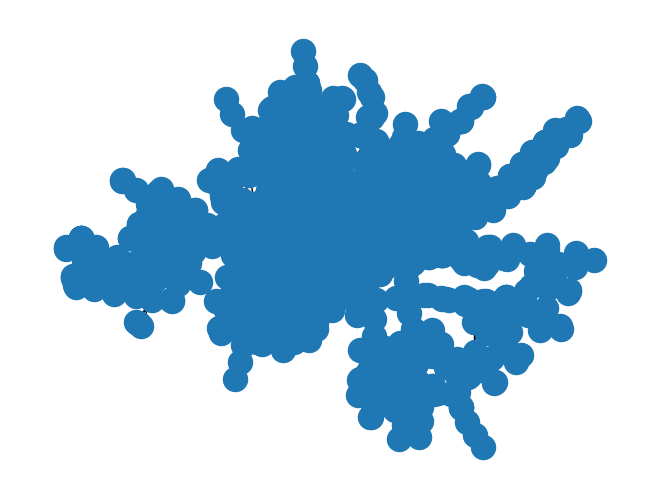

In [7]:
nx.draw(nx_graph, pos)

In [8]:
import plotly.express as px

method_name = "random"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df = pd.read_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))
df = pd.DataFrame()
for row in data_df.itertuples():
    quality_metrics = {}
    for qm_name in row.quality_metrics:
        quality_metrics[NAME_ABBREVIATIONS[qm_name]] = row.quality_metrics[
            qm_name
        ]
    df = pd.concat(
        [df, pd.DataFrame([{**quality_metrics, "method_name": method_name}])]
    )


method_name = "mds"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df = pd.read_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))
for row in data_df.itertuples():
    quality_metrics = {}
    for qm_name in row.quality_metrics:
        quality_metrics[NAME_ABBREVIATIONS[qm_name]] = row.quality_metrics[
            qm_name
        ]
    df = pd.concat(
        [df, pd.DataFrame([{**quality_metrics, "method_name": method_name}])]
    )


fig = px.scatter_matrix(
    df,
    title=f"{DATASET_NAME} {method_name}",
    dimensions=[NAME_ABBREVIATIONS[qm_name] for qm_name in ALL_QM_NAMES],
    color="method_name",
)
fig.update_traces(marker=dict(size=2))
fig.update_layout(
    margin=dict(t=30, r=20, b=10),
)
fig.show()


In [9]:
import matplotlib.pyplot as plt
from config import paths
from PIL import Image


def get_concat_h(im1, im2):
    dst = Image.new("RGB", (im1.width + im2.width, im1.height), "black")
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


def get_concat_v(im1, im2):
    dst = Image.new("RGB", (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst


boxplot_data = {}
for qm_name in ALL_QM_NAMES:
    boxplot_data[NAME_ABBREVIATIONS[qm_name]] = {
        "random": [],
        "mds": [],
    }

for _, row in df.iterrows():
    row_dict = row.to_dict()
    quality_metrics = {}
    for qm_name in ALL_QM_NAMES:
        boxplot_data[NAME_ABBREVIATIONS[qm_name]][
            row_dict["method_name"]
        ].append(row_dict[NAME_ABBREVIATIONS[qm_name]])
for qm_name in ALL_QM_NAMES:
    bins = [
        boxplot_data[NAME_ABBREVIATIONS[qm_name]][method_name]
        for method_name in ["random", "mds"]
    ]
    plt.figure(figsize=(3, 2))
    plt.subplots_adjust(left=0.3, top=0.8, bottom=0.2)
    plt.tick_params(axis="x", labelsize=18)
    plt.tick_params(axis="y", labelsize=14)
    plt.title(
        f"{NAME_ABBREVIATIONS[qm_name]}",
        fontsize=18,
    )
    plt.boxplot(
        bins,
        labels=["random", "mds"],
        widths=0.4,
    )
    paths.get_project_root_path().joinpath("data").joinpath(
        "experiments"
    ).joinpath("initial_placement").joinpath("random_vs_mds").joinpath(
        UUID
    ).joinpath(
        "images"
    ).mkdir(
        parents=True, exist_ok=True
    )
    plt.savefig(
        paths.get_project_root_path()
        .joinpath("data")
        .joinpath("experiments")
        .joinpath("initial_placement")
        .joinpath("random_vs_mds")
        .joinpath(UUID)
        .joinpath("images")
        .joinpath(f"{DATASET_NAME}-{qm_name}.png"),
        format="png",
        dpi=300,
        facecolor="white",
    )
    plt.close()

dst_export_path = (
    paths.get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("initial_placement")
    .joinpath("random_vs_mds")
    .joinpath(UUID)
    .joinpath("images")
    .joinpath(f"{DATASET_NAME}.png")
)

images = []
tmp = []

for qm_name in ALL_QM_NAMES:
    image_path = (
        paths.get_project_root_path()
        .joinpath("data")
        .joinpath("experiments")
        .joinpath("initial_placement")
        .joinpath("random_vs_mds")
        .joinpath(UUID)
        .joinpath("images")
        .joinpath(f"{DATASET_NAME}-{qm_name}.png")
    )
    image_path.parent.mkdir(exist_ok=True, parents=True)
    img = Image.open(image_path)

    tmp.append({"image": img})

    if len(tmp) == 3:
        images.append(tmp)
        tmp = []

dst = None
for v in images:
    h_dst = None
    for h in v:
        if h_dst is None:
            h_dst = h["image"]
            continue
        h_dst = get_concat_h(h_dst, h["image"])
    if dst is None:
        dst = h_dst
        continue
    dst = get_concat_v(dst, h_dst)

dst.save(dst_export_path)
